In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import h5py 

In [2]:
def get_go_annotations_as_panda(species):
    import pandas as pd
    ## TAXA_ID to species_name
    if type(species) == int:
        mapper = pd.read_csv(
            '/home/passala/Gene_duplication_project/Generated_tables/Time_Savers/Species_name_resolver.csv'
        )
        species = mapper['Common Name'].loc[mapper['Taxa ID'] == species].item()

    ## Get file_location
    file_location = '/data/CoCoCoNet/gene2go/' + species + '_gene2go.csv'
    original_csv = pd.read_csv(file_location, sep=' ')
    if len(original_csv) == 0:
        raise NameError('No Annotations for this Species :(')
    original_csv = original_csv.dropna()
    original_csv['Present'] = 1
    matrixed_version = original_csv.pivot(index='NetworkIDs',
                                          columns='GO_term',
                                          values='Present')
    filled_matrixed_version = matrixed_version.fillna(value=0)
    return filled_matrixed_version

In [3]:
arabidopsis_annotations = get_go_annotations_as_panda('arabidopsis')

In [4]:
arabidopsis_annotations

GO_term     GO:0000002  GO:0000003  GO:0000009  GO:0000012  GO:0000014  \
NetworkIDs                                                               
AT1G01010          0.0         0.0         0.0         0.0         0.0   
AT1G01020          0.0         0.0         0.0         0.0         0.0   
AT1G01030          0.0         1.0         0.0         0.0         0.0   
AT1G01040          0.0         1.0         0.0         0.0         0.0   
AT1G01046          0.0         0.0         0.0         0.0         0.0   
...                ...         ...         ...         ...         ...   
ATMG01350          0.0         0.0         0.0         0.0         0.0   
ATMG01360          0.0         0.0         0.0         0.0         0.0   
ATMG01370          0.0         0.0         0.0         0.0         0.0   
ATMG01400          0.0         0.0         0.0         0.0         0.0   
ATMG01410          0.0         0.0         0.0         0.0         0.0   

GO_term     GO:0000015  GO:0000018  GO:0000019  GO:0000023  GO:0000024  ...  \
NetworkIDs                                                              ...   
AT1G01010          0.0         0.0         0.0         0.0         0.0  ...   
AT1G01020          0.0         0.0         0.0         0.0         0.0  ...   
AT1G01030          0.0         0.0         0.0         0.0         0.0  ...   
AT1G01040          0.0         0.0         0.0         0.0         0.0  ...   
AT1G01046          0.0         0.0         0.0         0.0         0.0  ...   
...                ...         ...         ...         ...         ...  ...   
ATMG01350          0.0         0.0         0.0         0.0         0.0  ...   
ATMG01360          0.0         0.0         0.0         0.0         0.0  ...   
ATMG01370          0.0         0.0         0.0         0.0         0.0  ...   
ATMG01400          0.0         0.0         0.0         0.0         0.0  ...   
ATMG01410          0.0         0.0         0.0         0.0         0.0  ...   

GO_term     GO:2001251  GO:2001252  GO:2001253  GO:2001257  GO:2001279  \
NetworkIDs                                                               
AT1G01010          0.0         0.0         0.0         0.0         0.0   
AT1G01020          0.0         0.0         0.0         0.0         0.0   
AT1G01030          0.0         0.0         0.0         0.0         0.0   
AT1G01040          0.0         0.0         0.0         0.0         0.0   
AT1G01046          0.0         0.0         0.0         0.0         0.0   
...                ...         ...         ...         ...         ...   
ATMG01350          0.0         0.0         0.0         0.0         0.0   
ATMG01360          0.0         0.0         0.0         0.0         0.0   
ATMG01370          0.0         0.0         0.0         0.0         0.0   
ATMG01400          0.0         0.0         0.0         0.0         0.0   
ATMG01410          0.0         0.0         0.0         0.0         0.0   

GO_term     GO:2001280  GO:2001289  GO:2001293  GO:2001294  GO:2001295  
NetworkIDs                                                              
AT1G01010          0.0         0.0         0.0         0.0         0.0  
AT1G01020          0.0         0.0         0.0         0.0         0.0  
AT1G01030          0.0         0.0         0.0         0.0         0.0  
AT1G01040          0.0         0.0         0.0         0.0         0.0  
AT1G01046          0.0         0.0         0.0         0.0         0.0  
...                ...         ...         ...         ...         ...  
ATMG01350          0.0         0.0         0.0         0.0         0.0  
ATMG01360          0.0         0.0         0.0         0.0         0.0  
ATMG01370          0.0         0.0         0.0         0.0         0.0  
ATMG01400          0.0         0.0         0.0         0.0         0.0  
ATMG01410          0.0         0.0         0.0         0.0         0.0  

[28874 rows x 10704 columns]

In [5]:
full_annotated_group_list = pd.read_csv('/data/passala/Generated_Tables/Reference_tables/all_annotated_go_groups.csv',encoding = 'cp1252',index_col= 0)

In [6]:
full_annotated_group_list

Avg FC  Avg EGAD  \
GO:0000003  0.740324  0.634227   
GO:0000018  0.766573  0.798689   
GO:0000027  0.923946  0.869159   
GO:0000028  0.951180  0.875073   
GO:0000030  0.714718  0.642678   
...              ...       ...   
GO:2001020  0.821085  0.761272   
GO:2001070  0.720227  0.869219   
GO:2001141  0.722697  0.673483   
GO:2001251  0.778751  0.805120   
GO:2001252  0.821120  0.790655   

                                                      Name  EGAD Counts  \
GO:0000003                                    reproduction           10   
GO:0000018                 regulation of DNA recombination            8   
GO:0000027                ribosomal large subunit assembly            9   
GO:0000028                ribosomal small subunit assembly            9   
GO:0000030                    mannosyltransferase activity            8   
...                                                    ...          ...   
GO:2001020   regulation of response to DNA damage stimulus            9   
GO:2001070                                  starch binding            7   
GO:2001141          regulation of RNA biosynthetic process            6   
GO:2001251  negative regulation of chromosome organization            9   
GO:2001252  positive regulation of chromosome organization            8   

           Annotation                            Notes  
GO:0000003       None                              NaN  
GO:0000018       None                              NaN  
GO:0000027  Ribosomal                              NaN  
GO:0000028  Ribosomal                              NaN  
GO:0000030       None  Critical function in eukaryotes  
...               ...                              ...  
GO:2001020       None                              NaN  
GO:2001070       None                              NaN  
GO:2001141       None                              NaN  
GO:2001251       None                              NaN  
GO:2001252       None                              NaN  

[3011 rows x 6 columns]

In [7]:
  genes_of_interest = arabidopsis_annotations[arabidopsis_annotations.columns.intersection(full_annotated_group_list.index.to_list())]

In [8]:
genes_of_interest

GO_term     GO:0000003  GO:0000018  GO:0000027  GO:0000028  GO:0000030  \
NetworkIDs                                                               
AT1G01010          0.0         0.0         0.0         0.0         0.0   
AT1G01020          0.0         0.0         0.0         0.0         0.0   
AT1G01030          1.0         0.0         0.0         0.0         0.0   
AT1G01040          1.0         0.0         0.0         0.0         0.0   
AT1G01046          0.0         0.0         0.0         0.0         0.0   
...                ...         ...         ...         ...         ...   
ATMG01350          0.0         0.0         0.0         0.0         0.0   
ATMG01360          0.0         0.0         0.0         0.0         0.0   
ATMG01370          0.0         0.0         0.0         0.0         0.0   
ATMG01400          0.0         0.0         0.0         0.0         0.0   
ATMG01410          0.0         0.0         0.0         0.0         0.0   

GO_term     GO:0000036  GO:0000038  GO:0000041  GO:0000045  GO:0000049  ...  \
NetworkIDs                                                              ...   
AT1G01010          0.0         0.0         0.0         0.0         0.0  ...   
AT1G01020          0.0         0.0         0.0         0.0         0.0  ...   
AT1G01030          0.0         0.0         0.0         0.0         0.0  ...   
AT1G01040          0.0         0.0         0.0         0.0         0.0  ...   
AT1G01046          0.0         0.0         0.0         0.0         0.0  ...   
...                ...         ...         ...         ...         ...  ...   
ATMG01350          0.0         0.0         0.0         0.0         0.0  ...   
ATMG01360          0.0         0.0         0.0         0.0         0.0  ...   
ATMG01370          0.0         0.0         0.0         0.0         0.0  ...   
ATMG01400          0.0         0.0         0.0         0.0         0.0  ...   
ATMG01410          0.0         0.0         0.0         0.0         0.0  ...   

GO_term     GO:2000242  GO:2000243  GO:2000280  GO:2000377  GO:2000816  \
NetworkIDs                                                               
AT1G01010          0.0         0.0         0.0         0.0         0.0   
AT1G01020          0.0         0.0         0.0         0.0         0.0   
AT1G01030          0.0         0.0         0.0         0.0         0.0   
AT1G01040          0.0         0.0         0.0         0.0         0.0   
AT1G01046          0.0         0.0         0.0         0.0         0.0   
...                ...         ...         ...         ...         ...   
ATMG01350          0.0         0.0         0.0         0.0         0.0   
ATMG01360          0.0         0.0         0.0         0.0         0.0   
ATMG01370          0.0         0.0         0.0         0.0         0.0   
ATMG01400          0.0         0.0         0.0         0.0         0.0   
ATMG01410          0.0         0.0         0.0         0.0         0.0   

GO_term     GO:2001020  GO:2001070  GO:2001141  GO:2001251  GO:2001252  
NetworkIDs                                                              
AT1G01010          0.0         0.0         1.0         0.0         0.0  
AT1G01020          0.0         0.0         0.0         0.0         0.0  
AT1G01030          0.0         0.0         1.0         0.0         0.0  
AT1G01040          0.0         0.0         0.0         0.0         0.0  
AT1G01046          0.0         0.0         0.0         0.0         0.0  
...                ...         ...         ...         ...         ...  
ATMG01350          0.0         0.0         0.0         0.0         0.0  
ATMG01360          0.0         0.0         0.0         0.0         0.0  
ATMG01370          0.0         0.0         0.0         0.0         0.0  
ATMG01400          0.0         0.0         0.0         0.0         0.0  
ATMG01410          0.0         0.0         0.0         0.0         0.0  

[28874 rows x 3011 columns]

In [9]:
list_of_duplicates = pd.read_csv('/data/passala/Generated_Tables/arabidopsis_gene_duplicate_list.csv')

In [10]:
list_of_duplicates

Duplicate 1 Duplicate 2        Mode     Subtype
0       AT1G01010   AT4G01550         WGD       alpha
1       AT1G01020   AT4G01510         WGD       alpha
2       AT1G01030   AT4G01500         WGD       alpha
3       AT1G01050   AT4G01480         WGD       alpha
4       AT1G01070   AT4G01450         WGD       alpha
...           ...         ...         ...         ...
11625   AT4G18670   AT3G24480  transposed  16-107 Mya
11626   AT3G06570   AT4G39550  transposed  16-107 Mya
11627   AT2G32180   AT2G32650  transposed  16-107 Mya
11628   AT1G22900   AT2G21100  transposed  16-107 Mya
11629   AT1G02630   AT1G70330  transposed  16-107 Mya

[11630 rows x 4 columns]

In [11]:
non_wgd = list_of_duplicates.loc[list_of_duplicates['Mode'] != 'WGD']

In [12]:
non_wgd['Subtype'].value_counts()

tandem        2130
16-107 Mya    1862
<16 Mya       1701
proximal       784
Name: Subtype, dtype: int64

In [13]:
list_of_duplicates.loc[list_of_duplicates['Mode'] == 'transposed']

Duplicate 1 Duplicate 2        Mode     Subtype
8067    AT1G01150   AT4G12670  transposed     <16 Mya
8068    AT1G01410   AT5G60110  transposed     <16 Mya
8069    AT1G01530   AT5G60440  transposed     <16 Mya
8070    AT1G01980   AT1G11770  transposed     <16 Mya
8071    AT1G02060   AT2G37230  transposed     <16 Mya
...           ...         ...         ...         ...
11625   AT4G18670   AT3G24480  transposed  16-107 Mya
11626   AT3G06570   AT4G39550  transposed  16-107 Mya
11627   AT2G32180   AT2G32650  transposed  16-107 Mya
11628   AT1G22900   AT2G21100  transposed  16-107 Mya
11629   AT1G02630   AT1G70330  transposed  16-107 Mya

[3563 rows x 4 columns]

In [14]:
non_wgd['Mode'].value_counts()

transposed    3563
local         2914
Name: Mode, dtype: int64

In [15]:
list_of_wgd = list_of_duplicates.loc[list_of_duplicates['Mode'] == 'WGD']

In [16]:
tandem_and_wgd = list_of_duplicates.loc[list_of_duplicates['Subtype'].isin(['alpha','beta','gamma','tandem'])]
#tandem_and_wgd = list_of_duplicates


In [17]:
reference_gene_list = list_of_wgd['Duplicate 1'].to_list() + list_of_wgd['Duplicate 2'].to_list()
len(reference_gene_list)

10306

In [18]:
no_dupes_wgd = list(set(reference_gene_list))

In [19]:
go_term_list = pd.DataFrame(index = genes_of_interest.columns)
go_term_list['Percent of Genes in Duplicate'] = np.nan
go_term_list['GO Term Size'] = np.nan

In [20]:
go_term_list

Percent of Genes in Duplicate  GO Term Size
GO_term                                                
GO:0000003                            NaN           NaN
GO:0000018                            NaN           NaN
GO:0000027                            NaN           NaN
GO:0000028                            NaN           NaN
GO:0000030                            NaN           NaN
...                                   ...           ...
GO:2001020                            NaN           NaN
GO:2001070                            NaN           NaN
GO:2001141                            NaN           NaN
GO:2001251                            NaN           NaN
GO:2001252                            NaN           NaN

[3011 rows x 2 columns]

In [21]:
list_of_percentages = []
list_of_term_sizes = []
for term in genes_of_interest.columns:
    genes_in_go_group = genes_of_interest.loc[genes_of_interest[term]==1].index.to_list()
    term_size = len(genes_in_go_group)
    intersect_of_term_with_wgd_list = list(set(genes_in_go_group) & set(no_dupes_wgd))
    len_intersect = len(intersect_of_term_with_wgd_list)
    percent_genes_retained_in_dupe = len_intersect/term_size
    list_of_percentages.append(percent_genes_retained_in_dupe)
    list_of_term_sizes.append(term_size)
go_term_list['Percent of Genes in Duplicate'] = list_of_percentages
go_term_list['GO Term Size'] = list_of_term_sizes


    
    

In [22]:
go_term_list['Annotation'] = full_annotated_group_list['Annotation']
all_annotated_groups_to_plot = go_term_list.loc[go_term_list['Annotation'] != 'None']

In [23]:
ribosomal_to_plot = all_annotated_groups_to_plot.loc[all_annotated_groups_to_plot['Annotation']== 'Ribosomal']
genes_with_ribosomal = arabidopsis_annotations[arabidopsis_annotations.columns.intersection(ribosomal_to_plot.index.to_list())]
genes_with_ribosomal = genes_with_ribosomal[(genes_with_ribosomal == 1).any(axis = 1)]
hormonal_to_plot = all_annotated_groups_to_plot.loc[all_annotated_groups_to_plot['Annotation']== 'Hormonal']
genes_with_hormonal = arabidopsis_annotations[arabidopsis_annotations.columns.intersection(hormonal_to_plot.index.to_list())]
genes_with_hormonal = genes_with_hormonal[(genes_with_hormonal == 1).any(axis = 1)]
secondary_to_plot = all_annotated_groups_to_plot.loc[all_annotated_groups_to_plot['Annotation']== 'Secondary Metabolism']
genes_with_secondary = arabidopsis_annotations[arabidopsis_annotations.columns.intersection(secondary_to_plot.index.to_list())]
genes_with_secondary = genes_with_secondary[(genes_with_secondary == 1).any(axis = 1)]
photosynthesis_to_plot = all_annotated_groups_to_plot.loc[all_annotated_groups_to_plot['Annotation']== 'Photosynthesis']
genes_with_photosynthesis = arabidopsis_annotations[arabidopsis_annotations.columns.intersection(photosynthesis_to_plot.index.to_list())]
genes_with_photosynthesis = genes_with_photosynthesis[(genes_with_photosynthesis == 1).any(axis = 1)]

In [24]:
genes_with_ribosomal

GO_term     GO:0000027  GO:0000028  GO:0000054  GO:0000055  GO:0000154  \
NetworkIDs                                                               
AT1G01040          0.0         0.0         0.0         0.0         0.0   
AT1G01080          0.0         0.0         0.0         0.0         0.0   
AT1G01100          0.0         0.0         0.0         0.0         0.0   
AT1G01120          0.0         0.0         0.0         0.0         0.0   
AT1G01860          0.0         0.0         0.0         0.0         1.0   
...                ...         ...         ...         ...         ...   
ATMG00210          1.0         0.0         0.0         0.0         0.0   
ATMG00290          0.0         0.0         0.0         0.0         0.0   
ATMG00560          0.0         0.0         0.0         0.0         0.0   
ATMG00980          0.0         0.0         0.0         0.0         0.0   
ATMG01270          0.0         1.0         0.0         0.0         0.0   

GO_term     GO:0000313  GO:0000314  GO:0000315  GO:0000460  GO:0000462  ...  \
NetworkIDs                                                              ...   
AT1G01040          0.0         0.0         0.0         0.0         0.0  ...   
AT1G01080          0.0         0.0         0.0         0.0         0.0  ...   
AT1G01100          0.0         0.0         0.0         0.0         0.0  ...   
AT1G01120          0.0         0.0         0.0         0.0         0.0  ...   
AT1G01860          0.0         0.0         0.0         0.0         0.0  ...   
...                ...         ...         ...         ...         ...  ...   
ATMG00210          0.0         0.0         0.0         0.0         0.0  ...   
ATMG00290          0.0         0.0         0.0         0.0         0.0  ...   
ATMG00560          1.0         0.0         1.0         0.0         0.0  ...   
ATMG00980          0.0         0.0         0.0         0.0         0.0  ...   
ATMG01270          1.0         1.0         0.0         0.0         0.0  ...   

GO_term     GO:0042274  GO:0043022  GO:0043023  GO:0044391  GO:0070180  \
NetworkIDs                                                               
AT1G01040          0.0         0.0         0.0         0.0         0.0   
AT1G01080          0.0         0.0         0.0         0.0         0.0   
AT1G01100          0.0         0.0         0.0         1.0         0.0   
AT1G01120          0.0         0.0         0.0         0.0         0.0   
AT1G01860          0.0         0.0         0.0         0.0         0.0   
...                ...         ...         ...         ...         ...   
ATMG00210          0.0         0.0         0.0         1.0         0.0   
ATMG00290          0.0         0.0         0.0         0.0         0.0   
ATMG00560          0.0         0.0         0.0         1.0         0.0   
ATMG00980          0.0         0.0         0.0         1.0         0.0   
ATMG01270          1.0         0.0         0.0         1.0         0.0   

GO_term     GO:0070181  GO:0070475  GO:0071428  GO:0140102  GO:1901259  
NetworkIDs                                                              
AT1G01040          0.0         0.0         0.0         0.0         0.0  
AT1G01080          0.0         0.0         0.0         0.0         1.0  
AT1G01100          0.0         0.0         0.0         0.0         0.0  
AT1G01120          0.0         0.0         0.0         0.0         0.0  
AT1G01860          0.0         0.0         0.0         1.0         0.0  
...                ...         ...         ...         ...         ...  
ATMG00210          0.0         0.0         0.0         0.0         0.0  
ATMG00290          0.0         0.0         0.0         0.0         0.0  
ATMG00560          0.0         0.0         0.0         0.0         0.0  
ATMG00980          0.0         0.0         0.0         0.0         0.0  
ATMG01270          0.0         0.0         0.0         0.0         0.0  

[997 rows x 55 columns]

In [25]:
annotated_gene_panda = pd.DataFrame(data = genes_of_interest.index.to_list(),columns = ['Genes'])
annotated_gene_panda['Annotation'] = 'None'

In [26]:
annotated_gene_panda['Annotation'].loc[annotated_gene_panda['Genes'].isin(genes_with_ribosomal.index.to_list())] = 'Ribosomal'
annotated_gene_panda['Annotation'].loc[annotated_gene_panda['Genes'].isin(genes_with_secondary.index.to_list())] = 'Secondary Metabolism'
annotated_gene_panda['Annotation'].loc[annotated_gene_panda['Genes'].isin(genes_with_hormonal.index.to_list())] = 'Hormonal'
annotated_gene_panda['Annotation'].loc[annotated_gene_panda['Genes'].isin(genes_with_photosynthesis.index.to_list())] = 'Photosynthesis'
annotated_gene_panda

Genes            Annotation
0      AT1G01010                  None
1      AT1G01020        Photosynthesis
2      AT1G01030  Secondary Metabolism
3      AT1G01040  Secondary Metabolism
4      AT1G01046                  None
...          ...                   ...
28869  ATMG01350                  None
28870  ATMG01360                  None
28871  ATMG01370                  None
28872  ATMG01400                  None
28873  ATMG01410                  None

[28874 rows x 2 columns]

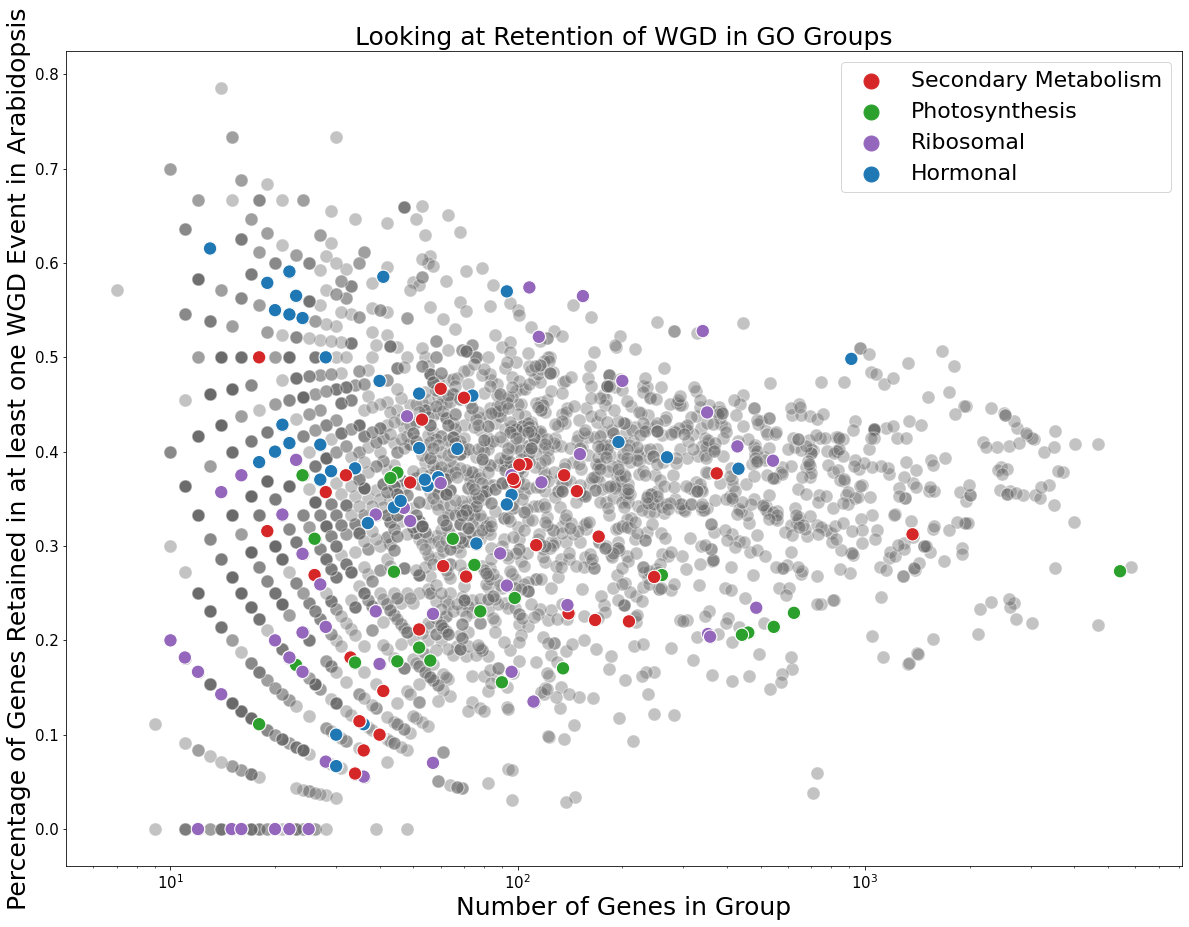

In [27]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = go_term_list,x = 'GO Term Size',y = 'Percent of Genes in Duplicate',s = 170,color = 'dimgray', alpha = .4)
sns.scatterplot(data = all_annotated_groups_to_plot, x = 'GO Term Size',y = 'Percent of Genes in Duplicate',s = 180, hue = 'Annotation', hue_order =['Secondary Metabolism','Photosynthesis','Ribosomal','Hormonal'], palette = ['tab:red','tab:green','tab:purple','tab:blue'])

plt.ylabel("Percentage of Genes Retained in at least one WGD Event in Arabidopsis", fontsize = 25)
plt.xlabel("Number of Genes in Group", fontsize = 25)
plt.title("Looking at Retention of WGD in GO Groups", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_xscale('log')
plt.legend(fontsize= 22,markerscale = 2.5)

In [28]:
go_term_list

Percent of Genes in Duplicate  GO Term Size Annotation
GO_term                                                           
GO:0000003                       0.324602          1947       None
GO:0000018                       0.212121            33       None
GO:0000027                       0.437500            48  Ribosomal
GO:0000028                       0.333333            39  Ribosomal
GO:0000030                       0.259259            27       None
...                                   ...           ...        ...
GO:2001020                       0.244898            49       None
GO:2001070                       0.166667            12       None
GO:2001141                       0.439208          2525       None
GO:2001251                       0.244444            45       None
GO:2001252                       0.222222            45       None

[3011 rows x 3 columns]

Text(0.5, 0, 'Annotation')

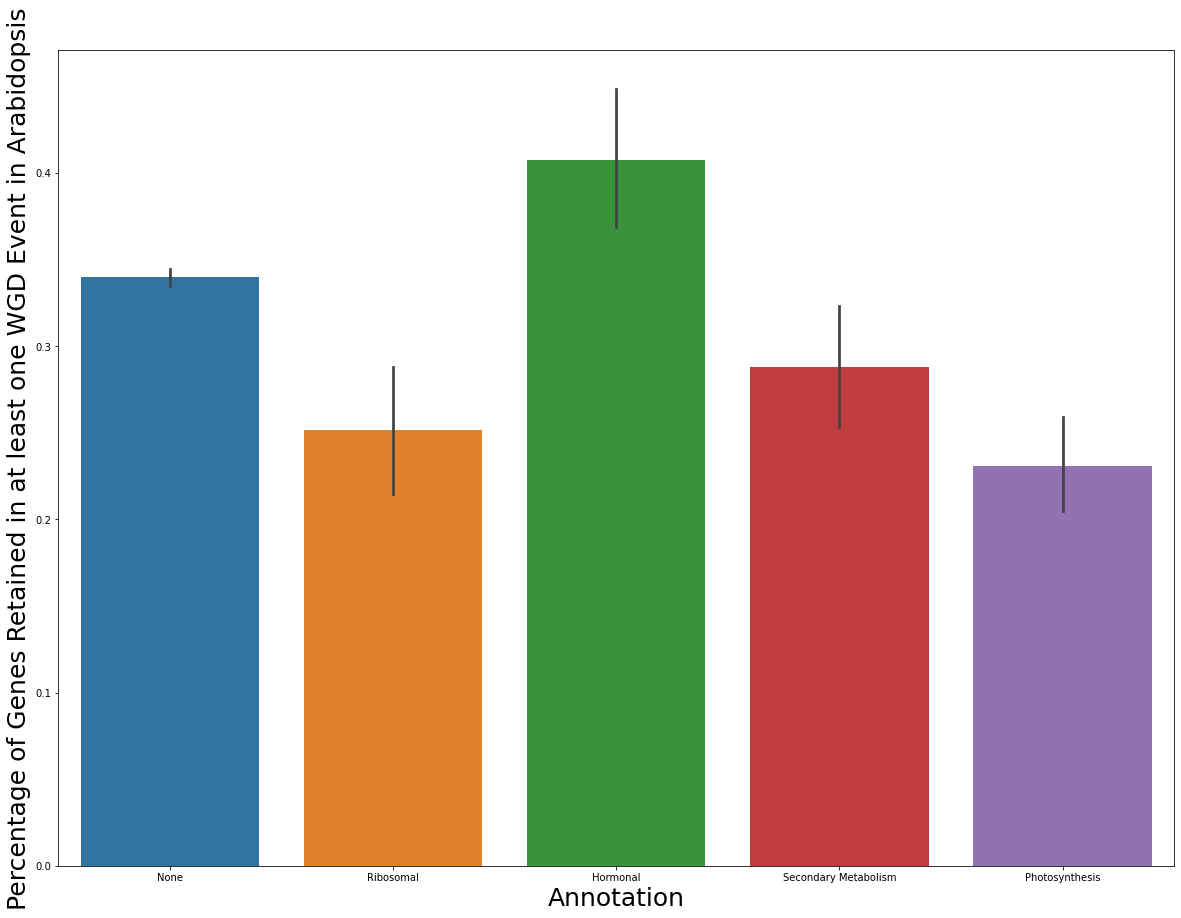

In [29]:
fig, ax = plt.subplots(figsize = (20,15))
sns.barplot(x = 'Annotation',y = 'Percent of Genes in Duplicate',data = go_term_list)
plt.ylabel("Percentage of Genes Retained in at least one WGD Event in Arabidopsis", fontsize = 25)
plt.xlabel("Annotation", fontsize = 25)

In [30]:
list_of_tau_values = pd.read_csv('/home/passala/Gene_duplication_project/R_data_files/tau_values_arabidopsis_genes.csv',index_col=0)
tau_means = list_of_tau_values.mean(axis =1)
tau_variance = list_of_tau_values.var(axis = 1)

In [31]:
tau_means

Gene
AT1G01010    0.638989
AT1G01020    0.530322
AT1G01030    0.868478
AT1G01040    0.643144
AT1G01050    0.456970
               ...   
ATCG01110    0.828732
ATCG01120    0.708998
ATCG01130    0.627930
ATCG01230    0.997982
ATCG01310    0.884492
Length: 22271, dtype: float64

<AxesSubplot:ylabel='Count'>

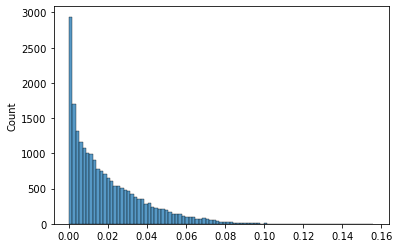

In [32]:
sns.histplot(tau_variance)

In [33]:
tau_score = pd.DataFrame(data = {'Mean Gene 1':tau_means,'Variance Gene 1':tau_variance},index = list_of_tau_values.index)
tau_score = tau_score.reset_index()
tau_score

Gene  Mean Gene 1  Variance Gene 1
0      AT1G01010     0.638989         0.017786
1      AT1G01020     0.530322         0.013721
2      AT1G01030     0.868478         0.001386
3      AT1G01040     0.643144         0.018264
4      AT1G01050     0.456970         0.028323
...          ...          ...              ...
22266  ATCG01110     0.828732         0.005142
22267  ATCG01120     0.708998         0.000349
22268  ATCG01130     0.627930         0.003351
22269  ATCG01230     0.997982              NaN
22270  ATCG01310     0.884492              NaN

[22271 rows x 3 columns]

In [34]:
list_of_wgd

Duplicate 1 Duplicate 2 Mode Subtype
0      AT1G01010   AT4G01550  WGD   alpha
1      AT1G01020   AT4G01510  WGD   alpha
2      AT1G01030   AT4G01500  WGD   alpha
3      AT1G01050   AT4G01480  WGD   alpha
4      AT1G01070   AT4G01450  WGD   alpha
...          ...         ...  ...     ...
5148   AT2G46590   AT4G24060  WGD   gamma
5149   AT3G61850   AT4G24060  WGD   gamma
5150   AT3G62110   AT4G23820  WGD   gamma
5151   AT2G47240   AT4G23850  WGD   gamma
5152   AT2G47240   AT4G11030  WGD   gamma

[5153 rows x 4 columns]

In [35]:
gene_1_intermediate = list_of_wgd.merge(how = 'left', left_on='Duplicate 1',right_on='Gene', right = tau_score)
gene_1_intermediate = gene_1_intermediate.drop(columns = ['Mode','Gene'])
tandem_intermediate = tandem_and_wgd.merge(how = 'left', left_on='Duplicate 1',right_on='Gene', right = tau_score)
tandem_intermediate = tandem_intermediate.drop(columns = ['Mode','Gene'])

In [36]:
tau_score_set_2 = pd.DataFrame(data = {'Mean Gene 2':tau_means,'Variance Gene 2':tau_variance},index = list_of_tau_values.index)
tau_score_set_2 = tau_score_set_2.reset_index()
tau_score_set_2

Gene  Mean Gene 2  Variance Gene 2
0      AT1G01010     0.638989         0.017786
1      AT1G01020     0.530322         0.013721
2      AT1G01030     0.868478         0.001386
3      AT1G01040     0.643144         0.018264
4      AT1G01050     0.456970         0.028323
...          ...          ...              ...
22266  ATCG01110     0.828732         0.005142
22267  ATCG01120     0.708998         0.000349
22268  ATCG01130     0.627930         0.003351
22269  ATCG01230     0.997982              NaN
22270  ATCG01310     0.884492              NaN

[22271 rows x 3 columns]

In [37]:
wgd_with_gene_tau_scores =gene_1_intermediate.merge(how = 'left', left_on = 'Duplicate 2',right_on='Gene',right = tau_score_set_2)
wgd_with_gene_tau_scores = wgd_with_gene_tau_scores.drop(columns = 'Gene')
tandem_with_tau = tandem_intermediate.merge(how = 'left', left_on = 'Duplicate 2',right_on='Gene',right = tau_score_set_2)
tandem_with_tau = tandem_with_tau.drop(columns= 'Gene')


In [38]:
wgd_with_gene_tau_scores

Duplicate 1 Duplicate 2 Subtype  Mean Gene 1  Variance Gene 1  \
0      AT1G01010   AT4G01550   alpha     0.638989         0.017786   
1      AT1G01020   AT4G01510   alpha     0.530322         0.013721   
2      AT1G01030   AT4G01500   alpha     0.868478         0.001386   
3      AT1G01050   AT4G01480   alpha     0.456970         0.028323   
4      AT1G01070   AT4G01450   alpha     0.946858         0.002466   
...          ...         ...     ...          ...              ...   
5148   AT2G46590   AT4G24060   gamma     0.879893         0.006065   
5149   AT3G61850   AT4G24060   gamma     0.860116         0.004426   
5150   AT3G62110   AT4G23820   gamma     0.633130         0.028101   
5151   AT2G47240   AT4G23850   gamma     0.879380         0.005208   
5152   AT2G47240   AT4G11030   gamma     0.879380         0.005208   

      Mean Gene 2  Variance Gene 2  
0        0.744169         0.006109  
1        0.752567         0.016859  
2        0.994126              NaN  
3        0.785525         0.008619  
4        0.894614         0.004048  
...           ...              ...  
5148     0.747657         0.004182  
5149     0.747657         0.004182  
5150     0.792594         0.007103  
5151     0.293993         0.020055  
5152     0.955232              NaN  

[5153 rows x 7 columns]

In [39]:
tandem_with_tau['Difference in scores'] = abs(tandem_with_tau['Mean Gene 1']-tandem_with_tau['Mean Gene 2'])
tandem_with_tau = tandem_with_tau.dropna(subset = ['Mean Gene 1', 'Mean Gene 2'])

In [40]:
tandem_with_tau

Duplicate 1 Duplicate 2     Subtype  Mean Gene 1  Variance Gene 1  \
0       AT1G01010   AT4G01550       alpha     0.638989         0.017786   
1       AT1G01020   AT4G01510       alpha     0.530322         0.013721   
2       AT1G01030   AT4G01500       alpha     0.868478         0.001386   
3       AT1G01050   AT4G01480       alpha     0.456970         0.028323   
4       AT1G01070   AT4G01450       alpha     0.946858         0.002466   
...           ...         ...         ...          ...              ...   
11621   AT5G61920   AT3G14750  16-107 Mya     0.641268         0.060567   
11625   AT4G18670   AT3G24480  16-107 Mya     0.619187         0.024625   
11626   AT3G06570   AT4G39550  16-107 Mya     0.646446         0.065136   
11627   AT2G32180   AT2G32650  16-107 Mya     0.798627         0.023665   
11628   AT1G22900   AT2G21100  16-107 Mya     0.939211         0.003146   

       Mean Gene 2  Variance Gene 2  Difference in scores  
0         0.744169         0.006109              0.105180  
1         0.752567         0.016859              0.222245  
2         0.994126              NaN              0.125648  
3         0.785525         0.008619              0.328555  
4         0.894614         0.004048              0.052244  
...            ...              ...                   ...  
11621     0.639007         0.028748              0.002261  
11625     0.601578         0.017463              0.017609  
11626     0.861911         0.008128              0.215466  
11627     0.868284         0.005749              0.069657  
11628     0.973204         0.001798              0.033993  

[8278 rows x 8 columns]

In [41]:
#tandem_with_tau.to_csv('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Generated_tables_minor_use/all_dupes_tau_scored.csv', index = False) # if uncommented make sure to switch line above to make tandem_with_tau all genes dupes

In [42]:
wgd_with_gene_tau_scores['Difference in scores'] = abs(wgd_with_gene_tau_scores['Mean Gene 1']-wgd_with_gene_tau_scores['Mean Gene 2'])
wgd_with_gene_tau_scores = wgd_with_gene_tau_scores.dropna(subset = ['Mean Gene 1', 'Mean Gene 2'])
wgd_with_gene_tau_scores

Duplicate 1 Duplicate 2 Subtype  Mean Gene 1  Variance Gene 1  \
0      AT1G01010   AT4G01550   alpha     0.638989         0.017786   
1      AT1G01020   AT4G01510   alpha     0.530322         0.013721   
2      AT1G01030   AT4G01500   alpha     0.868478         0.001386   
3      AT1G01050   AT4G01480   alpha     0.456970         0.028323   
4      AT1G01070   AT4G01450   alpha     0.946858         0.002466   
...          ...         ...     ...          ...              ...   
5148   AT2G46590   AT4G24060   gamma     0.879893         0.006065   
5149   AT3G61850   AT4G24060   gamma     0.860116         0.004426   
5150   AT3G62110   AT4G23820   gamma     0.633130         0.028101   
5151   AT2G47240   AT4G23850   gamma     0.879380         0.005208   
5152   AT2G47240   AT4G11030   gamma     0.879380         0.005208   

      Mean Gene 2  Variance Gene 2  Difference in scores  
0        0.744169         0.006109              0.105180  
1        0.752567         0.016859              0.222245  
2        0.994126              NaN              0.125648  
3        0.785525         0.008619              0.328555  
4        0.894614         0.004048              0.052244  
...           ...              ...                   ...  
5148     0.747657         0.004182              0.132237  
5149     0.747657         0.004182              0.112460  
5150     0.792594         0.007103              0.159465  
5151     0.293993         0.020055              0.585386  
5152     0.955232              NaN              0.075852  

[4327 rows x 8 columns]

Text(0.5, 0, 'WGD Event')

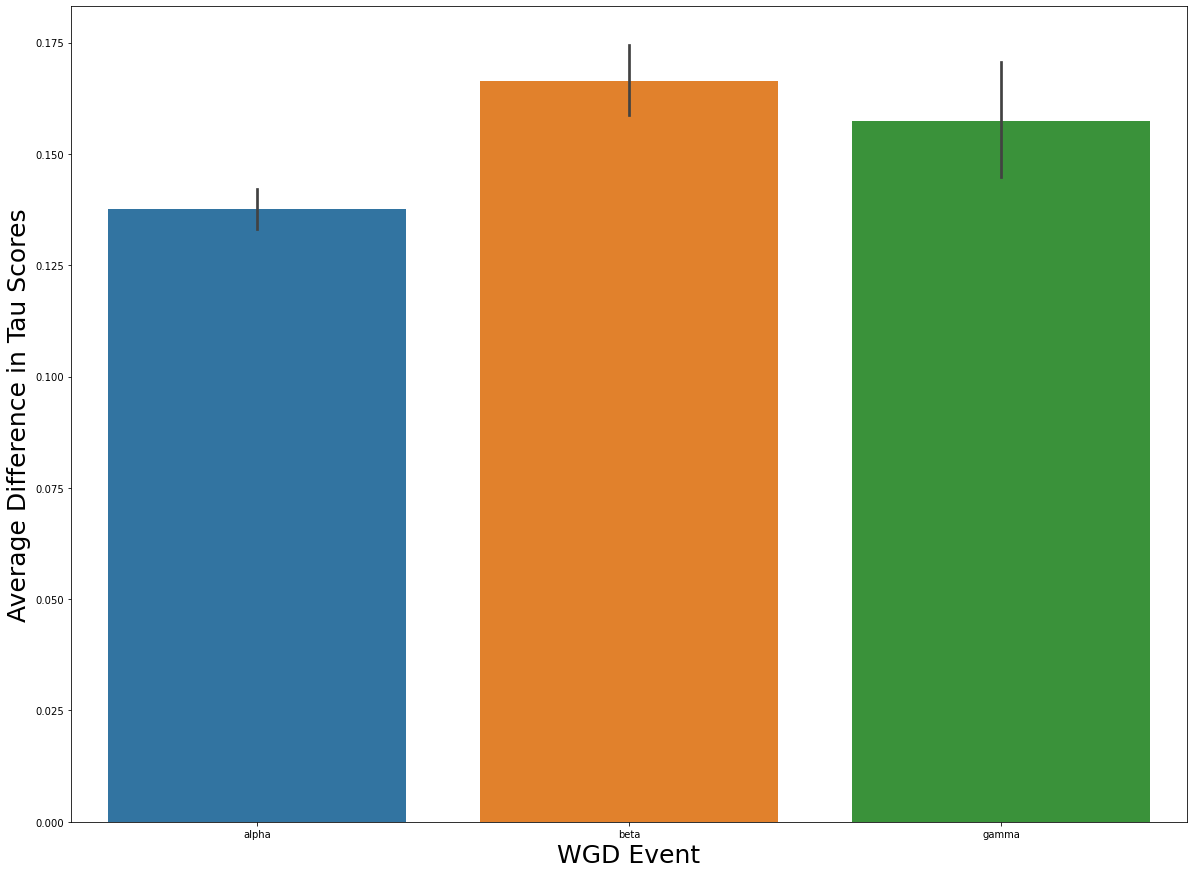

In [43]:
fig, ax = plt.subplots(figsize = (20,15))
sns.barplot(x = 'Subtype',y = 'Difference in scores',data = wgd_with_gene_tau_scores)
plt.ylabel("Average Difference in Tau Scores", fontsize = 25)
plt.xlabel("WGD Event", fontsize = 25)

(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

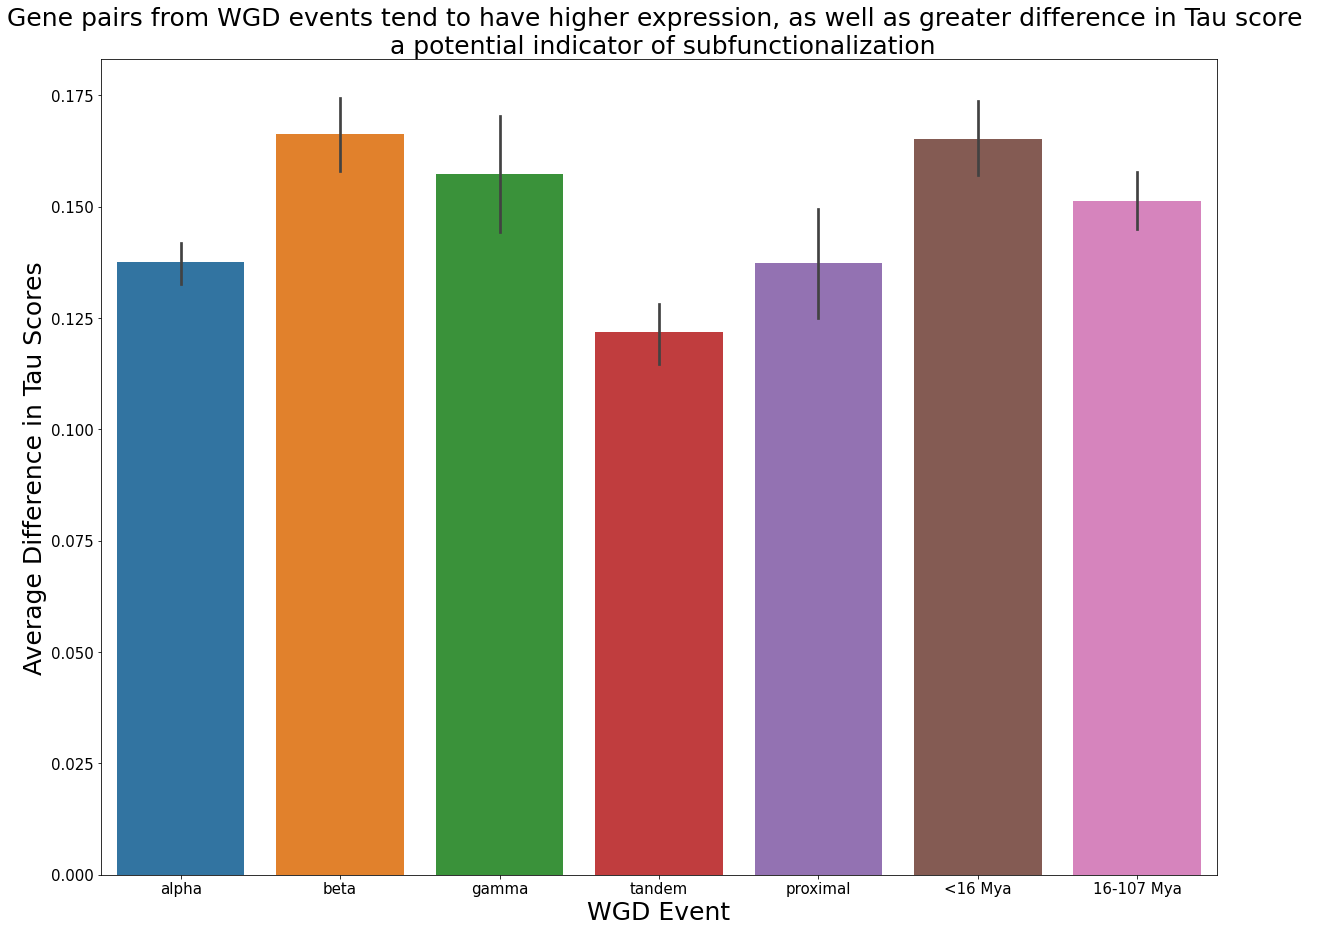

In [44]:
fig, ax = plt.subplots(figsize = (20,15))
sns.barplot(x = 'Subtype',y = 'Difference in scores',data = tandem_with_tau)
plt.ylabel("Average Difference in Tau Scores", fontsize = 25)
plt.xlabel("WGD Event", fontsize = 25)
plt.title("Gene pairs from WGD events tend to have higher expression, as well as greater difference in Tau score \n a potential indicator of subfunctionalization", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

<AxesSubplot:xlabel='Subtype', ylabel='Difference in scores'>

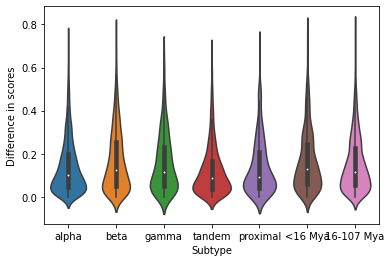

In [45]:
sns.violinplot(x = 'Subtype',y = 'Difference in scores', data = tandem_with_tau)

In [46]:
ara_hp5 = h5py.File('/data/passala/Data_from_CoCoCoNet/single_cell_data/Ara_data.hdf5')

In [47]:
list(ara_hp5.keys())

['coldata', 'embedding', 'normalized_counts', 'rowdata']

In [48]:
ara_hp5['coldata']

<HDF5 dataset "coldata": shape (16641,), type "|V20">

In [49]:
ara_hp5['embedding'][4]

(-10.49990426, -0.00519497, b'AAACCTGAGGGTGTTG-1')

In [50]:
row_dataset = ara_hp5['rowdata']

In [51]:
len(ara_hp5['normalized_counts'][:,1])

16641

In [52]:
count_dataset = ara_hp5['normalized_counts']

In [53]:
row_gene_list = []
for gene in row_dataset:
    row_gene_list.append(gene[1].decode('UTF-8'))


In [54]:
i = 0 
avg_count = []
for gene in row_gene_list:
    avg_count.append(np.mean(ara_hp5['normalized_counts'][:,i]))
    i += 1 

In [55]:
normalized_avg_counts = pd.DataFrame (data = zip(row_gene_list,avg_count),columns =['Gene','Normalized Avg Count'])

In [56]:
tandem_with_tau

Duplicate 1 Duplicate 2     Subtype  Mean Gene 1  Variance Gene 1  \
0       AT1G01010   AT4G01550       alpha     0.638989         0.017786   
1       AT1G01020   AT4G01510       alpha     0.530322         0.013721   
2       AT1G01030   AT4G01500       alpha     0.868478         0.001386   
3       AT1G01050   AT4G01480       alpha     0.456970         0.028323   
4       AT1G01070   AT4G01450       alpha     0.946858         0.002466   
...           ...         ...         ...          ...              ...   
11621   AT5G61920   AT3G14750  16-107 Mya     0.641268         0.060567   
11625   AT4G18670   AT3G24480  16-107 Mya     0.619187         0.024625   
11626   AT3G06570   AT4G39550  16-107 Mya     0.646446         0.065136   
11627   AT2G32180   AT2G32650  16-107 Mya     0.798627         0.023665   
11628   AT1G22900   AT2G21100  16-107 Mya     0.939211         0.003146   

       Mean Gene 2  Variance Gene 2  Difference in scores  
0         0.744169         0.006109              0.105180  
1         0.752567         0.016859              0.222245  
2         0.994126              NaN              0.125648  
3         0.785525         0.008619              0.328555  
4         0.894614         0.004048              0.052244  
...            ...              ...                   ...  
11621     0.639007         0.028748              0.002261  
11625     0.601578         0.017463              0.017609  
11626     0.861911         0.008128              0.215466  
11627     0.868284         0.005749              0.069657  
11628     0.973204         0.001798              0.033993  

[8278 rows x 8 columns]

In [57]:
tand_with_avg_counts_intermediate = tandem_with_tau.merge(how = 'left', left_on = 'Duplicate 1', right_on = 'Gene',right = normalized_avg_counts) 


In [58]:
tand_with_avg_counts = tand_with_avg_counts_intermediate.merge(how = 'left', left_on = 'Duplicate 2', right_on = 'Gene',right = normalized_avg_counts) 

In [59]:
tand_with_avg_counts = tand_with_avg_counts.drop(columns = ['Gene_x','Gene_y'])
tand_with_avg_counts = tand_with_avg_counts.rename(columns ={'Normalized Avg Count_y':'Normalized Avg Count Gene 2','Normalized Avg Count_x':'Normalized Avg Count Gene 1'})



In [60]:
tand_with_avg_counts['Highest Avg Normalized Count'] = tand_with_avg_counts[['Normalized Avg Count Gene 1','Normalized Avg Count Gene 2']].max(axis = 1)

In [61]:
tand_with_avg_counts

Duplicate 1 Duplicate 2     Subtype  Mean Gene 1  Variance Gene 1  \
0      AT1G01010   AT4G01550       alpha     0.638989         0.017786   
1      AT1G01020   AT4G01510       alpha     0.530322         0.013721   
2      AT1G01030   AT4G01500       alpha     0.868478         0.001386   
3      AT1G01050   AT4G01480       alpha     0.456970         0.028323   
4      AT1G01070   AT4G01450       alpha     0.946858         0.002466   
...          ...         ...         ...          ...              ...   
8273   AT5G61920   AT3G14750  16-107 Mya     0.641268         0.060567   
8274   AT4G18670   AT3G24480  16-107 Mya     0.619187         0.024625   
8275   AT3G06570   AT4G39550  16-107 Mya     0.646446         0.065136   
8276   AT2G32180   AT2G32650  16-107 Mya     0.798627         0.023665   
8277   AT1G22900   AT2G21100  16-107 Mya     0.939211         0.003146   

      Mean Gene 2  Variance Gene 2  Difference in scores  \
0        0.744169         0.006109              0.105180   
1        0.752567         0.016859              0.222245   
2        0.994126              NaN              0.125648   
3        0.785525         0.008619              0.328555   
4        0.894614         0.004048              0.052244   
...           ...              ...                   ...   
8273     0.639007         0.028748              0.002261   
8274     0.601578         0.017463              0.017609   
8275     0.861911         0.008128              0.215466   
8276     0.868284         0.005749              0.069657   
8277     0.973204         0.001798              0.033993   

      Normalized Avg Count Gene 1  Normalized Avg Count Gene 2  \
0                        1.374104                     0.345397   
1                        1.286104                     0.147586   
2                        0.291643                     0.000481   
3                        3.353274                     3.678924   
4                        0.152533                     0.169632   
...                           ...                          ...   
8273                     0.209585                     0.288922   
8274                     0.490957                     0.470402   
8275                     0.307012                     0.094743   
8276                     0.088047                     0.119887   
8277                     0.016775                     0.097776   

      Highest Avg Normalized Count  
0                         1.374104  
1                         1.286104  
2                         0.291643  
3                         3.678924  
4                         0.169632  
...                            ...  
8273                      0.288922  
8274                      0.490957  
8275                      0.307012  
8276                      0.119887  
8277                      0.097776  

[8278 rows x 11 columns]

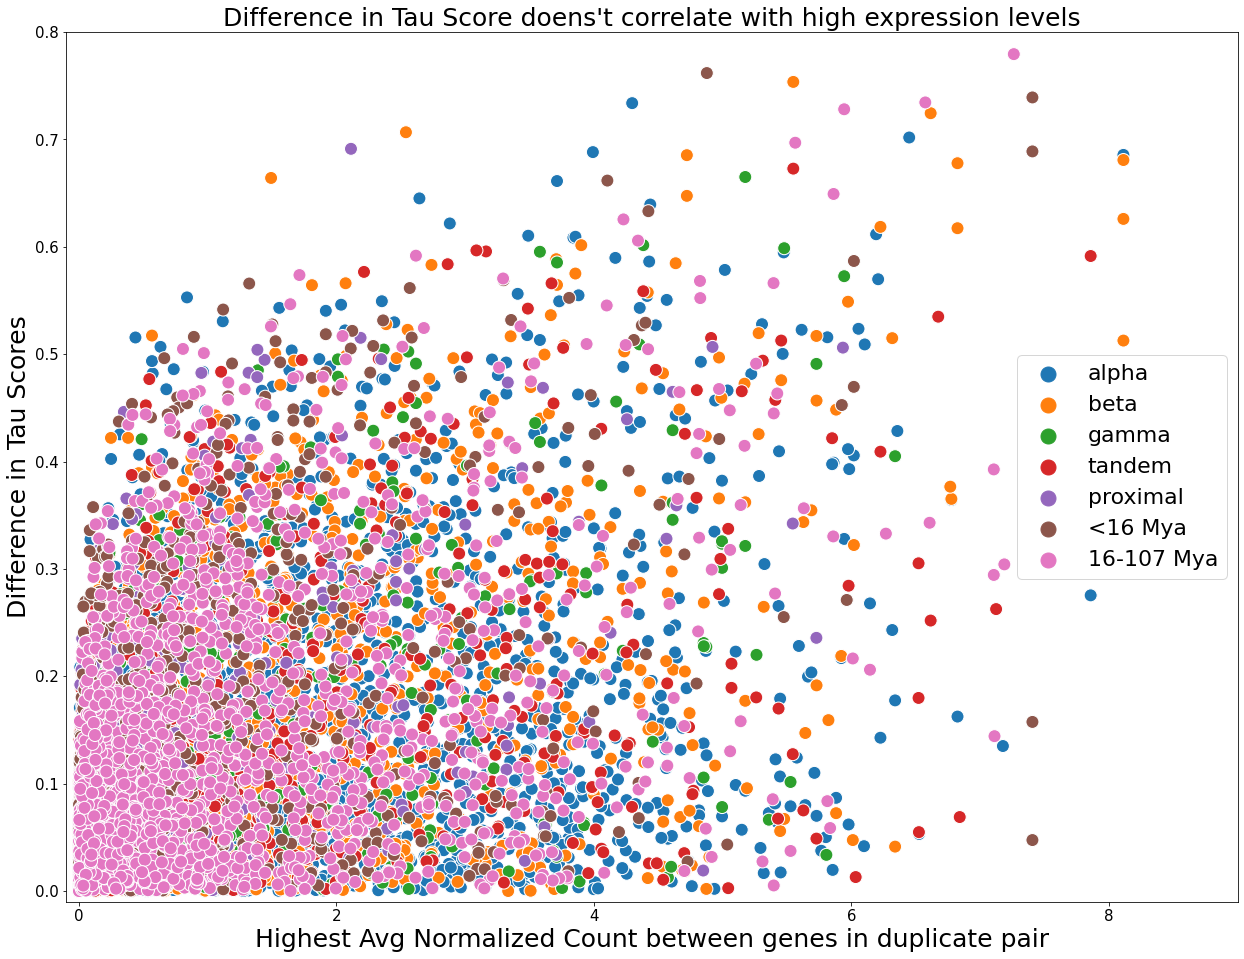

In [62]:
fig, ax = plt.subplots(figsize = (21,16))
sns.scatterplot(data = tand_with_avg_counts, x = 'Highest Avg Normalized Count', y = 'Difference in scores', hue = 'Subtype', s = 170, )
plt.ylabel("Difference in Tau Scores", fontsize = 25)
plt.xlabel("Highest Avg Normalized Count between genes in duplicate pair", fontsize = 25)
plt.title("Difference in Tau Score doens't correlate with high expression levels", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-0.1,9)
plt.ylim(-0.01,.8)
plt.legend(fontsize= 22,markerscale = 2.5)

In [63]:
tandem_with_tau

Duplicate 1 Duplicate 2     Subtype  Mean Gene 1  Variance Gene 1  \
0       AT1G01010   AT4G01550       alpha     0.638989         0.017786   
1       AT1G01020   AT4G01510       alpha     0.530322         0.013721   
2       AT1G01030   AT4G01500       alpha     0.868478         0.001386   
3       AT1G01050   AT4G01480       alpha     0.456970         0.028323   
4       AT1G01070   AT4G01450       alpha     0.946858         0.002466   
...           ...         ...         ...          ...              ...   
11621   AT5G61920   AT3G14750  16-107 Mya     0.641268         0.060567   
11625   AT4G18670   AT3G24480  16-107 Mya     0.619187         0.024625   
11626   AT3G06570   AT4G39550  16-107 Mya     0.646446         0.065136   
11627   AT2G32180   AT2G32650  16-107 Mya     0.798627         0.023665   
11628   AT1G22900   AT2G21100  16-107 Mya     0.939211         0.003146   

       Mean Gene 2  Variance Gene 2  Difference in scores  
0         0.744169         0.006109              0.105180  
1         0.752567         0.016859              0.222245  
2         0.994126              NaN              0.125648  
3         0.785525         0.008619              0.328555  
4         0.894614         0.004048              0.052244  
...            ...              ...                   ...  
11621     0.639007         0.028748              0.002261  
11625     0.601578         0.017463              0.017609  
11626     0.861911         0.008128              0.215466  
11627     0.868284         0.005749              0.069657  
11628     0.973204         0.001798              0.033993  

[8278 rows x 8 columns]

In [64]:
list_of_duplicates

Duplicate 1 Duplicate 2        Mode     Subtype
0       AT1G01010   AT4G01550         WGD       alpha
1       AT1G01020   AT4G01510         WGD       alpha
2       AT1G01030   AT4G01500         WGD       alpha
3       AT1G01050   AT4G01480         WGD       alpha
4       AT1G01070   AT4G01450         WGD       alpha
...           ...         ...         ...         ...
11625   AT4G18670   AT3G24480  transposed  16-107 Mya
11626   AT3G06570   AT4G39550  transposed  16-107 Mya
11627   AT2G32180   AT2G32650  transposed  16-107 Mya
11628   AT1G22900   AT2G21100  transposed  16-107 Mya
11629   AT1G02630   AT1G70330  transposed  16-107 Mya

[11630 rows x 4 columns]

In [65]:
arabidops_converter = pd.read_csv('/data/CoCoCoNet/geneInfo/arabidopsis_info.csv')

In [66]:
arabidops_converter.head(20)

EntrezID  EnsemblID    GeneSymbol   LocusTag  \
0     839580.0  AT1G01010        NAC001  AT1G01010   
1     839569.0  AT1G01020          ARV1  AT1G01020   
2   28716029.0        NaN     AT1G03987  AT1G03987   
3     839321.0  AT1G01030          NGA3  AT1G01030   
4     839574.0  AT1G01040          DCL1  AT1G01040   
5   28716030.0        NaN     AT1G03993  AT1G03993   
6    6240410.0        NaN        MIR838  AT1G01046   
7     839579.0  AT1G01050          PPa1  AT1G01050   
8   28716031.0        NaN     AT1G03997  AT1G03997   
9     839341.0  AT1G01060           LHY  AT1G01060   
10    839550.0  AT1G01070      UMAMIT28  AT1G01070   
11  28716032.0        NaN     AT1G04003  AT1G04003   
12    839463.0  AT1G01080     AT1G01080  AT1G01080   
13    839429.0  AT1G01090  PDH-E1 ALPHA  AT1G01090   
14    839410.0  AT1G01100     AT1G01100  AT1G01100   
15    839394.0  AT1G01110         IQD18  AT1G01110   
16    839395.0  AT1G01120          KCS1  AT1G01120   
17    839359.0  AT1G01130     AT1G01130  AT1G01130   
18    839349.0  AT1G01140         CIPK9  AT1G01140   
19    839294.0  AT1G01150     AT1G01150  AT1G01150   

                                             Synonyms  \
0   |ANAC001|NAC domain containing protein 1|T25K1...   
1                                 |T25K16.2|T25K16_2|   
2                                                 NaN   
3                         |NGATHA3|T25K16.3|T25K16_3|   
4   |ABNORMAL SUSPENSOR 1|ASU1|ATDCL1|CAF|CARPEL F...   
5                                                 NaN   
6                  |MIR838A|microRNA838A|p_MI0005394|   
7      |AtPPa1|T25K16.5|T25K16_5|pyrophosphorylase 1|   
8                                                 NaN   
9   |LATE ELONGATED HYPOCOTYL|LATE ELONGATED HYPOC...   
10  |T25K16.7|T25K16_7|Usually multiple acids move...   
11                                                NaN   
12                              |T25K16.19|T25K16_19|   
13  |T25K16.8|T25K16_8|pyruvate dehydrogenase E1 a...   
14                                |T25K16.9|T25K16_9|   
15                 |IQ-domain 18|T25K16.10|T25K16_10|   
16    |3-ketoacyl-CoA synthase 1|T25K16.11|T25K16_11|   
17                                          |F6F3.33|   
18  |CBL-interacting protein kinase 9|F6F3.28|PKS6...   
19                                          |F6F3.30|   

                               dbXrefs  Chromosome            Type  \
0   |Araport:AT1G01010|TAIR:AT1G01010|         1.0  protein-coding   
1   |Araport:AT1G01020|TAIR:AT1G01020|         1.0  protein-coding   
2                  |Araport:AT1G03987|         1.0           ncRNA   
3   |Araport:AT1G01030|TAIR:AT1G01030|         1.0  protein-coding   
4   |Araport:AT1G01040|TAIR:AT1G01040|         1.0  protein-coding   
5                  |Araport:AT1G03993|         1.0           ncRNA   
6   |Araport:AT1G01046|TAIR:AT1G01046|         1.0         miscRNA   
7   |Araport:AT1G01050|TAIR:AT1G01050|         1.0  protein-coding   
8                  |Araport:AT1G03997|         1.0           ncRNA   
9   |Araport:AT1G01060|TAIR:AT1G01060|         1.0  protein-coding   
10  |Araport:AT1G01070|TAIR:AT1G01070|         1.0  protein-coding   
11                 |Araport:AT1G04003|         1.0           ncRNA   
12  |Araport:AT1G01080|TAIR:AT1G01080|         1.0  protein-coding   
13  |Araport:AT1G01090|TAIR:AT1G01090|         1.0  protein-coding   
14  |Araport:AT1G01100|TAIR:AT1G01100|         1.0  protein-coding   
15  |Araport:AT1G01110|TAIR:AT1G01110|         1.0  protein-coding   
16  |Araport:AT1G01120|TAIR:AT1G01120|         1.0  protein-coding   
17  |Araport:AT1G01130|TAIR:AT1G01130|         1.0  protein-coding   
18  |Araport:AT1G01140|TAIR:AT1G01140|         1.0  protein-coding   
19  |Araport:AT1G01150|TAIR:AT1G01150|         1.0  protein-coding   

     UniProtID UniProtID2        OrthoID NetworkIDs  
0   A0A178WAE4     Q0WV96  3702_0:00165b  AT1G01010  
1       Q5MK24        NaN  3702_0:0014ef  AT1G01020  
2          NaN        NaN            NaN

In [67]:
uniprot_intermediate = list_of_duplicates.merge(how = 'left', left_on = 'Duplicate 1', right_on= 'EnsemblID', right = arabidops_converter[['EnsemblID','UniProtID']])
uniprot_intermediate = uniprot_intermediate.rename(columns ={'UniProtID':'UniProtID Duplicate 1'})
uniprot_intermediate = uniprot_intermediate.drop(columns = 'EnsemblID')
uniprot_intermediate

Duplicate 1 Duplicate 2        Mode     Subtype UniProtID Duplicate 1
0       AT1G01010   AT4G01550         WGD       alpha            A0A178WAE4
1       AT1G01020   AT4G01510         WGD       alpha                Q5MK24
2       AT1G01030   AT4G01500         WGD       alpha            A0A178W3T3
3       AT1G01050   AT4G01480         WGD       alpha            A0A178WLC4
4       AT1G01070   AT4G01450         WGD       alpha            A0A178WFU3
...           ...         ...         ...         ...                   ...
11625   AT4G18670   AT3G24480  transposed  16-107 Mya                Q9SN46
11626   AT3G06570   AT4G39550  transposed  16-107 Mya            A0A178V8P5
11627   AT2G32180   AT2G32650  transposed  16-107 Mya                Q9SKY2
11628   AT1G22900   AT2G21100  transposed  16-107 Mya                Q67YM6
11629   AT1G02630   AT1G70330  transposed  16-107 Mya            A0A178W3N0

[11630 rows x 5 columns]

In [68]:
uniprot_formatted_duplicates = uniprot_intermediate.merge(how = 'left', left_on = 'Duplicate 2', right_on= 'EnsemblID', right = arabidops_converter[['EnsemblID','UniProtID']])
uniprot_formatted_duplicates = uniprot_formatted_duplicates.rename(columns = {'UniProtID':'UniProtID Duplicate 2'})
uniprot_formatted_duplicates = uniprot_formatted_duplicates.drop(columns = 'EnsemblID')
uniprot_formatted_duplicates

Duplicate 1 Duplicate 2        Mode     Subtype UniProtID Duplicate 1  \
0       AT1G01010   AT4G01550         WGD       alpha            A0A178WAE4   
1       AT1G01020   AT4G01510         WGD       alpha                Q5MK24   
2       AT1G01030   AT4G01500         WGD       alpha            A0A178W3T3   
3       AT1G01050   AT4G01480         WGD       alpha            A0A178WLC4   
4       AT1G01070   AT4G01450         WGD       alpha            A0A178WFU3   
...           ...         ...         ...         ...                   ...   
11625   AT4G18670   AT3G24480  transposed  16-107 Mya                Q9SN46   
11626   AT3G06570   AT4G39550  transposed  16-107 Mya            A0A178V8P5   
11627   AT2G32180   AT2G32650  transposed  16-107 Mya                Q9SKY2   
11628   AT1G22900   AT2G21100  transposed  16-107 Mya                Q67YM6   
11629   AT1G02630   AT1G70330  transposed  16-107 Mya            A0A178W3N0   

      UniProtID Duplicate 2  
0                    Q9M126  
1                A0A1P8B5I8  
2                A0A178V2Z9  
3                A0A178V127  
4                    Q9M129  
...                     ...  
11625                Q9LHF1  
11626                Q9SVA3  
11627                O48852  
11628                Q84TH6  
11629                Q8VXY7  

[11630 rows x 6 columns]

In [69]:
#uniprot_formatted_duplicates.to_csv('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Generated_tables_minor_use/gene_duplicate_list_for_john_similarity_scores.csv')
#uniprot_formatted_duplicates.to_csv('/data/passala/For_John_Hover/gene_duplicate_list_for_john_similarity_scores.csv')

In [70]:
uniprot_checking_dup = uniprot_formatted_duplicates.loc[(uniprot_formatted_duplicates['UniProtID Duplicate 1']== 'Q0WQL0' ) | (uniprot_formatted_duplicates['UniProtID Duplicate 2'] == 'Q0WQL0')]
uniprot_checking_dup

Duplicate 1 Duplicate 2 Mode Subtype UniProtID Duplicate 1  \
22   AT1G01570   AT4G00300  WGD   alpha            A0A178WJ90   

   UniProtID Duplicate 2  
22                Q0WQL0

In [71]:
concordance = pd.read_csv('/data/passala/Generated_Tables/protein_dup_data/arath_concordance.tsv',sep = '\t')
concordance

proteinid protein species proteinacc   gene  taxonid
0      14310_ARATH   14310   ARATH     P48347  GRF10     3702
1      14311_ARATH   14311   ARATH     Q9S9Z8  GRF11     3702
2      14312_ARATH   14312   ARATH     Q9C5W6    NaN     3702
3      14331_ARATH   14331   ARATH     P42643   GRF1     3702
4      14332_ARATH   14332   ARATH     Q01525   GRF2     3702
...            ...     ...     ...        ...    ...      ...
16106  ZWIP2_ARATH   ZWIP2   ARATH     Q9SVY1    NaN     3702
16107  ZWIP3_ARATH   ZWIP3   ARATH     Q9SGD1    NaN     3702
16108  ZWIP4_ARATH   ZWIP4   ARATH     Q8W030    NaN     3702
16109  ZWIP5_ARATH   ZWIP5   ARATH     Q8W031    NaN     3702
16110  ZWIP6_ARATH   ZWIP6   ARATH     Q9FX68    NaN     3702

[16111 rows x 6 columns]

In [72]:
prot_dup_scores = pd.read_csv('/data/passala/Generated_Tables/protein_dup_data/gene_duplicate_pairs_out.tsv',sep = '\t')

In [73]:
prot_dup_scores['protein1'] = prot_dup_scores['protein1'].str.split('_')
prot_dup_scores['protein1'] = list(zip(*prot_dup_scores['protein1'].to_list()))[0]
prot_dup_scores['protein2'] = prot_dup_scores['protein2'].str.split('_')
prot_dup_scores['protein2'] = list(zip(*prot_dup_scores['protein2'].to_list()))[0]
prot_dup_scores


protein1    protein2  length  ident  simil  gaps   score  pident  \
0      A0A178WAE4       NAC69     494    165    239   102   567.5   0.334   
1            ARV1  A0A1P8B5I8     277    148    181    49   715.0   0.534   
2          C3VMM4  A0A178V2Z9     397    180    223   103   716.5   0.453   
3      A0A178WLC4  A0A178V127     216    192    199     4   999.0   0.889   
4      A0A178WFU3       WTR30     380    172    241    34   867.0   0.453   
...           ...         ...     ...    ...    ...   ...     ...     ...   
10914        LRX5        LRX4     861    399    439   371  1940.5   0.463   
10915  A0A178V8P5       FBK98     411    180    244    40   784.5   0.438   
10916      Q9SKY2      O48852     139    137    138     0   742.0   0.986   
10917       DIR11       DIR23     204     77    111    28   353.0   0.377   
10918  A0A178W3N0        ENT1     454    188    261    69   939.5   0.414   

       psimil  
0       0.484  
1       0.653  
2       0.562  
3       0.921  
4       0.634  
...       ...  
10914   0.510  
10915   0.594  
10916   0.993  
10917   0.544  
10918   0.575  

[10919 rows x 9 columns]

In [74]:
concordance['proteinid'] = concordance['proteinid'].str.split('_')
concordance['proteinid'] = list(zip(*concordance['proteinid'].to_list()))[0]
concordance = concordance.drop(columns = ['protein','species','gene','taxonid'])
concordance


proteinid proteinacc
0         14310     P48347
1         14311     Q9S9Z8
2         14312     Q9C5W6
3         14331     P42643
4         14332     Q01525
...         ...        ...
16106     ZWIP2     Q9SVY1
16107     ZWIP3     Q9SGD1
16108     ZWIP4     Q8W030
16109     ZWIP5     Q8W031
16110     ZWIP6     Q9FX68

[16111 rows x 2 columns]

In [75]:
dup_aligned_to_concord_1 = prot_dup_scores.merge(how = 'left', left_on= 'protein1',right_on= 'proteinid', right = concordance)
dup_aligned_to_concord_1['protein1'] = dup_aligned_to_concord_1['proteinacc']
dup_aligned_to_concord_1 = dup_aligned_to_concord_1.dropna()
dup_aligned_to_concord_1 = dup_aligned_to_concord_1.drop(columns = ['proteinid','proteinacc'])
dup_aligned_to_concord_1

protein1    protein2  length  ident  simil  gaps   score  pident  psimil
1       Q5MK24  A0A1P8B5I8     277    148    181    49   715.0   0.534   0.653
14      Q84JH9       TBL26     480    287    346    62  1557.0   0.598   0.721
30      Q9ZTZ7      F4JHE9    1220    936   1022    62  4399.5   0.767   0.838
33      F4HVZ1       CATB3     384    272    303    30  1455.5   0.708   0.789
43      O65312        EZA1     898    337    445   251  1497.5   0.375   0.496
...        ...         ...     ...    ...    ...   ...     ...     ...     ...
10902   P84634  A0A1P8B4K5    1743     97    147  1495   304.0   0.056   0.084
10904   Q9C975  A0A178VJT0     391     92    149   119   262.5   0.235   0.381
10907   Q9LPD9        MCM7    1021    246    376   390   873.5   0.241   0.368
10914   Q9SN46        LRX4     861    399    439   371  1940.5   0.463   0.510
10917   Q67YM6       DIR23     204     77    111    28   353.0   0.377   0.544

[3781 rows x 9 columns]

In [76]:
dup_both_aligned_to_concord2 = prot_dup_scores.merge(how = 'left', left_on= 'protein2',right_on= 'proteinid', right = concordance)
dup_both_aligned_to_concord2['protein2'] = dup_both_aligned_to_concord2['proteinacc']
dup_both_aligned_to_concord2 = dup_both_aligned_to_concord2.dropna()
dup_both_aligned_to_concord2 = dup_both_aligned_to_concord2.drop(columns = ['proteinid','proteinacc'])
dup_both_aligned_to_concord2

protein1 protein2  length  ident  simil  gaps   score  pident  psimil
0      A0A178WAE4   Q9M126     494    165    239   102   567.5   0.334   0.484
4      A0A178WFU3   Q9M129     380    172    241    34   867.0   0.453   0.634
6      A0A178WBA3   F4JHN2     552    377    419    43  1772.5   0.683   0.759
7          F4HQJ3   Q93VH6     261    144    150    70   620.5   0.552   0.575
9      A0A178W8D7   Q9LD40     716    578    624    25  2977.5   0.807   0.872
...           ...      ...     ...    ...    ...   ...     ...     ...     ...
10913  A0A2H1ZEN8   Q9SZY2     780    384    500    89  1965.5   0.492   0.641
10914        LRX5   Q9LHF1     861    399    439   371  1940.5   0.463   0.510
10915  A0A178V8P5   Q9SVA3     411    180    244    40   784.5   0.438   0.594
10917       DIR11   Q84TH6     204     77    111    28   353.0   0.377   0.544
10918  A0A178W3N0   Q8VXY7     454    188    261    69   939.5   0.414   0.575

[3998 rows x 9 columns]

In [77]:
double_aligned_to_concord = dup_aligned_to_concord_1.merge(right = dup_both_aligned_to_concord2[['protein2']],left_index= True,right_index = True)
double_aligned_to_concord['protein2'] = double_aligned_to_concord['protein2_y']
double_aligned_to_concord = double_aligned_to_concord.drop(columns = ['protein2_x','protein2_y'])
double_aligned_to_concord = double_aligned_to_concord[['protein1','protein2','length','ident','simil','gaps','score','pident','psimil']]
double_aligned_to_concord

protein1 protein2  length  ident  simil  gaps   score  pident  psimil
14      Q84JH9   O04621     480    287    346    62  1557.0   0.598   0.721
33      F4HVZ1   Q94K85     384    272    303    30  1455.5   0.708   0.789
43      O65312   Q9ZSM8     898    337    445   251  1497.5   0.375   0.496
48      Q9FWY9   O04253     363    282    311    19  1492.5   0.777   0.857
51      Q9SRX3   O81416     516    404    442    15  2117.0   0.783   0.857
...        ...      ...     ...    ...    ...   ...     ...     ...     ...
10895   Q9LVT1   Q9SZA7     820    411    501   201  2121.0   0.501   0.611
10898   Q9LU94   Q9ZUW3     883    243    406   197  1099.0   0.275   0.460
10907   Q9LPD9   P43299    1021    246    376   390   873.5   0.241   0.368
10914   Q9SN46   Q9LHF1     861    399    439   371  1940.5   0.463   0.510
10917   Q67YM6   Q84TH6     204     77    111    28   353.0   0.377   0.544

[2077 rows x 9 columns]

In [78]:
all_options_aligned = pd.concat([prot_dup_scores,dup_aligned_to_concord_1,dup_both_aligned_to_concord2,double_aligned_to_concord])
all_options_aligned

protein1    protein2  length  ident  simil  gaps   score  pident  \
0      A0A178WAE4       NAC69     494    165    239   102   567.5   0.334   
1            ARV1  A0A1P8B5I8     277    148    181    49   715.0   0.534   
2          C3VMM4  A0A178V2Z9     397    180    223   103   716.5   0.453   
3      A0A178WLC4  A0A178V127     216    192    199     4   999.0   0.889   
4      A0A178WFU3       WTR30     380    172    241    34   867.0   0.453   
...           ...         ...     ...    ...    ...   ...     ...     ...   
10895      Q9LVT1      Q9SZA7     820    411    501   201  2121.0   0.501   
10898      Q9LU94      Q9ZUW3     883    243    406   197  1099.0   0.275   
10907      Q9LPD9      P43299    1021    246    376   390   873.5   0.241   
10914      Q9SN46      Q9LHF1     861    399    439   371  1940.5   0.463   
10917      Q67YM6      Q84TH6     204     77    111    28   353.0   0.377   

       psimil  
0       0.484  
1       0.653  
2       0.562  
3       0.921  
4       0.634  
...       ...  
10895   0.611  
10898   0.460  
10907   0.368  
10914   0.510  
10917   0.544  

[20775 rows x 9 columns]

In [79]:
lined_up_protein = uniprot_formatted_duplicates.merge(how = 'left', left_on = ['UniProtID Duplicate 1','UniProtID Duplicate 2'],right_on = ['protein1','protein2'], right = all_options_aligned)


In [80]:
lined_up_protein = lined_up_protein.dropna()
lined_up_protein

Duplicate 1 Duplicate 2        Mode     Subtype UniProtID Duplicate 1  \
0       AT1G01010   AT4G01550         WGD       alpha            A0A178WAE4   
1       AT1G01020   AT4G01510         WGD       alpha                Q5MK24   
3       AT1G01050   AT4G01480         WGD       alpha            A0A178WLC4   
4       AT1G01070   AT4G01450         WGD       alpha            A0A178WFU3   
5       AT1G01100   AT4G00810         WGD       alpha            A0A178WHE0   
...           ...         ...         ...         ...                   ...   
11629   AT4G18670   AT3G24480  transposed  16-107 Mya                Q9SN46   
11630   AT3G06570   AT4G39550  transposed  16-107 Mya            A0A178V8P5   
11631   AT2G32180   AT2G32650  transposed  16-107 Mya                Q9SKY2   
11632   AT1G22900   AT2G21100  transposed  16-107 Mya                Q67YM6   
11633   AT1G02630   AT1G70330  transposed  16-107 Mya            A0A178W3N0   

      UniProtID Duplicate 2    protein1    protein2  length  ident  simil  \
0                    Q9M126  A0A178WAE4      Q9M126   494.0  165.0  239.0   
1                A0A1P8B5I8      Q5MK24  A0A1P8B5I8   277.0  148.0  181.0   
3                A0A178V127  A0A178WLC4  A0A178V127   216.0  192.0  199.0   
4                    Q9M129  A0A178WFU3      Q9M129   380.0  172.0  241.0   
5                    B9DFS7  A0A178WHE0      B9DFS7   113.0  104.0  108.0   
...                     ...         ...         ...     ...    ...    ...   
11629                Q9LHF1      Q9SN46      Q9LHF1   861.0  399.0  439.0   
11630                Q9SVA3  A0A178V8P5      Q9SVA3   411.0  180.0  244.0   
11631                O48852      Q9SKY2      O48852   139.0  137.0  138.0   
11632                Q84TH6      Q67YM6      Q84TH6   204.0   77.0  111.0   
11633                Q8VXY7  A0A178W3N0      Q8VXY7   454.0  188.0  261.0   

        gaps   score  pident  psimil  
0      102.0   567.5   0.334   0.484  
1       49.0   715.0   0.534   0.653  
3        4.0   999.0   0.889   0.921  
4       34.0   867.0   0.453   0.634  
5        1.0   515.0   0.920   0.956  
...      ...     ...     ...     ...  
11629  371.0  1940.5   0.463   0.510  
11630   40.0   784.5   0.438   0.594  
11631    0.0   742.0   0.986   0.993  
11632   28.0   353.0   0.377   0.544  
11633   69.0   939.5   0.414   0.575  

[9885 rows x 15 columns]

In [81]:
tand_with_avg_counts

Duplicate 1 Duplicate 2     Subtype  Mean Gene 1  Variance Gene 1  \
0      AT1G01010   AT4G01550       alpha     0.638989         0.017786   
1      AT1G01020   AT4G01510       alpha     0.530322         0.013721   
2      AT1G01030   AT4G01500       alpha     0.868478         0.001386   
3      AT1G01050   AT4G01480       alpha     0.456970         0.028323   
4      AT1G01070   AT4G01450       alpha     0.946858         0.002466   
...          ...         ...         ...          ...              ...   
8273   AT5G61920   AT3G14750  16-107 Mya     0.641268         0.060567   
8274   AT4G18670   AT3G24480  16-107 Mya     0.619187         0.024625   
8275   AT3G06570   AT4G39550  16-107 Mya     0.646446         0.065136   
8276   AT2G32180   AT2G32650  16-107 Mya     0.798627         0.023665   
8277   AT1G22900   AT2G21100  16-107 Mya     0.939211         0.003146   

      Mean Gene 2  Variance Gene 2  Difference in scores  \
0        0.744169         0.006109              0.105180   
1        0.752567         0.016859              0.222245   
2        0.994126              NaN              0.125648   
3        0.785525         0.008619              0.328555   
4        0.894614         0.004048              0.052244   
...           ...              ...                   ...   
8273     0.639007         0.028748              0.002261   
8274     0.601578         0.017463              0.017609   
8275     0.861911         0.008128              0.215466   
8276     0.868284         0.005749              0.069657   
8277     0.973204         0.001798              0.033993   

      Normalized Avg Count Gene 1  Normalized Avg Count Gene 2  \
0                        1.374104                     0.345397   
1                        1.286104                     0.147586   
2                        0.291643                     0.000481   
3                        3.353274                     3.678924   
4                        0.152533                     0.169632   
...                           ...                          ...   
8273                     0.209585                     0.288922   
8274                     0.490957                     0.470402   
8275                     0.307012                     0.094743   
8276                     0.088047                     0.119887   
8277                     0.016775                     0.097776   

      Highest Avg Normalized Count  
0                         1.374104  
1                         1.286104  
2                         0.291643  
3                         3.678924  
4                         0.169632  
...                            ...  
8273                      0.288922  
8274                      0.490957  
8275                      0.307012  
8276                      0.119887  
8277                      0.097776  

[8278 rows x 11 columns]

<AxesSubplot:xlabel='Subtype', ylabel='psimil'>

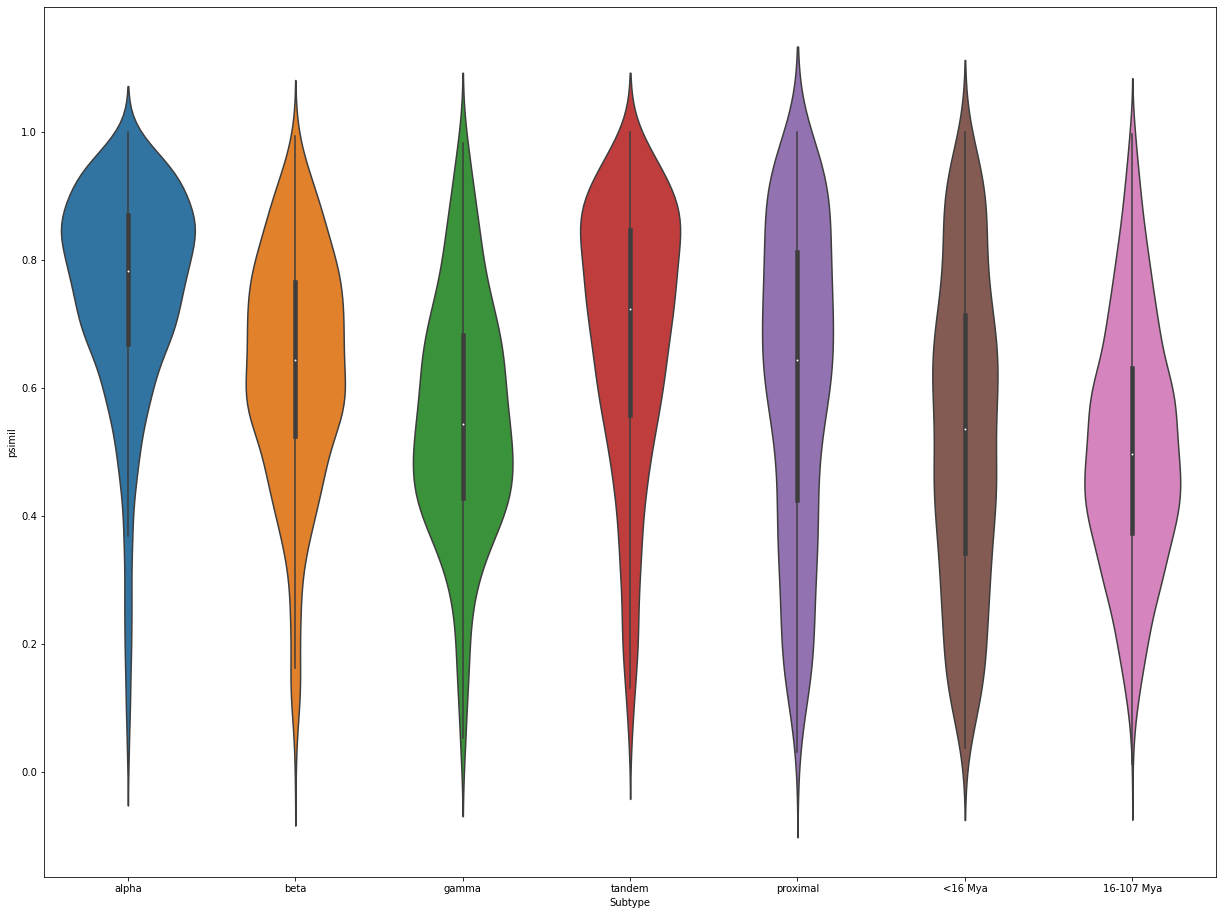

In [82]:
fig, ax = plt.subplots(figsize = (21,16))
sns.violinplot(x = 'Subtype',y = 'psimil', data = lined_up_protein)


In [83]:
full_duplicate_data = tand_with_avg_counts.merge(right = lined_up_protein[['Duplicate 1','Duplicate 2','psimil']],on = ['Duplicate 1','Duplicate 2'])
full_duplicate_data

Duplicate 1 Duplicate 2     Subtype  Mean Gene 1  Variance Gene 1  \
0      AT1G01010   AT4G01550       alpha     0.638989         0.017786   
1      AT1G01020   AT4G01510       alpha     0.530322         0.013721   
2      AT1G01050   AT4G01480       alpha     0.456970         0.028323   
3      AT1G01070   AT4G01450       alpha     0.946858         0.002466   
4      AT1G01100   AT4G00810       alpha     0.576244         0.030018   
...          ...         ...         ...          ...              ...   
7120   AT5G61920   AT3G14750  16-107 Mya     0.641268         0.060567   
7121   AT4G18670   AT3G24480  16-107 Mya     0.619187         0.024625   
7122   AT3G06570   AT4G39550  16-107 Mya     0.646446         0.065136   
7123   AT2G32180   AT2G32650  16-107 Mya     0.798627         0.023665   
7124   AT1G22900   AT2G21100  16-107 Mya     0.939211         0.003146   

      Mean Gene 2  Variance Gene 2  Difference in scores  \
0        0.744169         0.006109              0.105180   
1        0.752567         0.016859              0.222245   
2        0.785525         0.008619              0.328555   
3        0.894614         0.004048              0.052244   
4        0.527266         0.029890              0.048978   
...           ...              ...                   ...   
7120     0.639007         0.028748              0.002261   
7121     0.601578         0.017463              0.017609   
7122     0.861911         0.008128              0.215466   
7123     0.868284         0.005749              0.069657   
7124     0.973204         0.001798              0.033993   

      Normalized Avg Count Gene 1  Normalized Avg Count Gene 2  \
0                        1.374104                     0.345397   
1                        1.286104                     0.147586   
2                        3.353274                     3.678924   
3                        0.152533                     0.169632   
4                        3.801553                     3.650825   
...                           ...                          ...   
7120                     0.209585                     0.288922   
7121                     0.490957                     0.470402   
7122                     0.307012                     0.094743   
7123                     0.088047                     0.119887   
7124                     0.016775                     0.097776   

      Highest Avg Normalized Count  psimil  
0                         1.374104   0.484  
1                         1.286104   0.653  
2                         3.678924   0.921  
3                         0.169632   0.634  
4                         3.801553   0.956  
...                            ...     ...  
7120                      0.288922   0.365  
7121                      0.490957   0.510  
7122                      0.307012   0.594  
7123                      0.119887   0.993  
7124                      0.097776   0.544  

[7125 rows x 12 columns]

In [84]:
full_duplicate_data = full_duplicate_data.merge(right = annotated_gene_panda, how = 'left', left_on= 'Duplicate 1',right_on='Genes')
full_duplicate_data = full_duplicate_data.fillna(value = 'None')
full_duplicate_data

Duplicate 1 Duplicate 2     Subtype  Mean Gene 1 Variance Gene 1  \
0      AT1G01010   AT4G01550       alpha     0.638989        0.017786   
1      AT1G01020   AT4G01510       alpha     0.530322        0.013721   
2      AT1G01050   AT4G01480       alpha     0.456970        0.028323   
3      AT1G01070   AT4G01450       alpha     0.946858        0.002466   
4      AT1G01100   AT4G00810       alpha     0.576244        0.030018   
...          ...         ...         ...          ...             ...   
7120   AT5G61920   AT3G14750  16-107 Mya     0.641268        0.060567   
7121   AT4G18670   AT3G24480  16-107 Mya     0.619187        0.024625   
7122   AT3G06570   AT4G39550  16-107 Mya     0.646446        0.065136   
7123   AT2G32180   AT2G32650  16-107 Mya     0.798627        0.023665   
7124   AT1G22900   AT2G21100  16-107 Mya     0.939211        0.003146   

      Mean Gene 2 Variance Gene 2  Difference in scores  \
0        0.744169        0.006109              0.105180   
1        0.752567        0.016859              0.222245   
2        0.785525        0.008619              0.328555   
3        0.894614        0.004048              0.052244   
4        0.527266        0.029890              0.048978   
...           ...             ...                   ...   
7120     0.639007        0.028748              0.002261   
7121     0.601578        0.017463              0.017609   
7122     0.861911        0.008128              0.215466   
7123     0.868284        0.005749              0.069657   
7124     0.973204        0.001798              0.033993   

      Normalized Avg Count Gene 1  Normalized Avg Count Gene 2  \
0                        1.374104                     0.345397   
1                        1.286104                     0.147586   
2                        3.353274                     3.678924   
3                        0.152533                     0.169632   
4                        3.801553                     3.650825   
...                           ...                          ...   
7120                     0.209585                     0.288922   
7121                     0.490957                     0.470402   
7122                     0.307012                     0.094743   
7123                     0.088047                     0.119887   
7124                     0.016775                     0.097776   

      Highest Avg Normalized Count  psimil      Genes      Annotation  
0                         1.374104   0.484  AT1G01010            None  
1                         1.286104   0.653  AT1G01020  Photosynthesis  
2                         3.678924   0.921  AT1G01050            None  
3                         0.169632   0.634  AT1G01070            None  
4                         3.801553   0.956  AT1G01100       Ribosomal  
...                            ...     ...        ...             ...  
7120                      0.288922   0.365  AT5G61920            None  
7121                      0.490957   0.510  AT4G18670            None  
7122                      0.307012   0.594  AT3G06570            None  
7123                      0.119887   0.993  AT2G32180  Photosynthesis  
7124                      0.097776   0.544  AT1G22900            None  

[7125 rows x 14 columns]

In [85]:
only_wgd = full_duplicate_data.loc[full_duplicate_data['Subtype'].isin(['alpha','beta','gamma'])]
only_wgd

Duplicate 1 Duplicate 2 Subtype  Mean Gene 1 Variance Gene 1  \
0      AT1G01010   AT4G01550   alpha     0.638989        0.017786   
1      AT1G01020   AT4G01510   alpha     0.530322        0.013721   
2      AT1G01050   AT4G01480   alpha     0.456970        0.028323   
3      AT1G01070   AT4G01450   alpha     0.946858        0.002466   
4      AT1G01100   AT4G00810   alpha     0.576244        0.030018   
...          ...         ...     ...          ...             ...   
3637   AT3G61830   AT4G23980   gamma     0.859028        0.010860   
3638   AT2G46530   AT4G23980   gamma     0.870729        0.011470   
3639   AT3G62110   AT4G23820   gamma     0.633130        0.028101   
3640   AT2G47240   AT4G23850   gamma     0.879380        0.005208   
3641   AT2G47240   AT4G11030   gamma     0.879380        0.005208   

      Mean Gene 2 Variance Gene 2  Difference in scores  \
0        0.744169        0.006109              0.105180   
1        0.752567        0.016859              0.222245   
2        0.785525        0.008619              0.328555   
3        0.894614        0.004048              0.052244   
4        0.527266        0.029890              0.048978   
...           ...             ...                   ...   
3637     0.763511        0.009219              0.095516   
3638     0.763511        0.009219              0.107217   
3639     0.792594        0.007103              0.159465   
3640     0.293993        0.020055              0.585386   
3641     0.955232            None              0.075852   

      Normalized Avg Count Gene 1  Normalized Avg Count Gene 2  \
0                        1.374104                     0.345397   
1                        1.286104                     0.147586   
2                        3.353274                     3.678924   
3                        0.152533                     0.169632   
4                        3.801553                     3.650825   
...                           ...                          ...   
3637                     0.049615                     0.282742   
3638                     0.023765                     0.282742   
3639                     0.451067                     0.455927   
3640                     0.054215                     3.713449   
3641                     0.054215                     0.000878   

      Highest Avg Normalized Count  psimil      Genes            Annotation  
0                         1.374104   0.484  AT1G01010                  None  
1                         1.286104   0.653  AT1G01020        Photosynthesis  
2                         3.678924   0.921  AT1G01050                  None  
3                         0.169632   0.634  AT1G01070                  None  
4                         3.801553   0.956  AT1G01100             Ribosomal  
...                            ...     ...        ...                   ...  
3637                      0.282742   0.637  AT3G61830              Hormonal  
3638                      0.282742   0.643  AT2G46530              Hormonal  
3639                      0.455927   0.631  AT3G62110                  None  
3640                      3.713449   0.693  AT2G47240  Secondary Metabolism  
3641                      0.054215   0.671  AT2G47240  Secondary Metabolism  

[3642 rows x 14 columns]

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

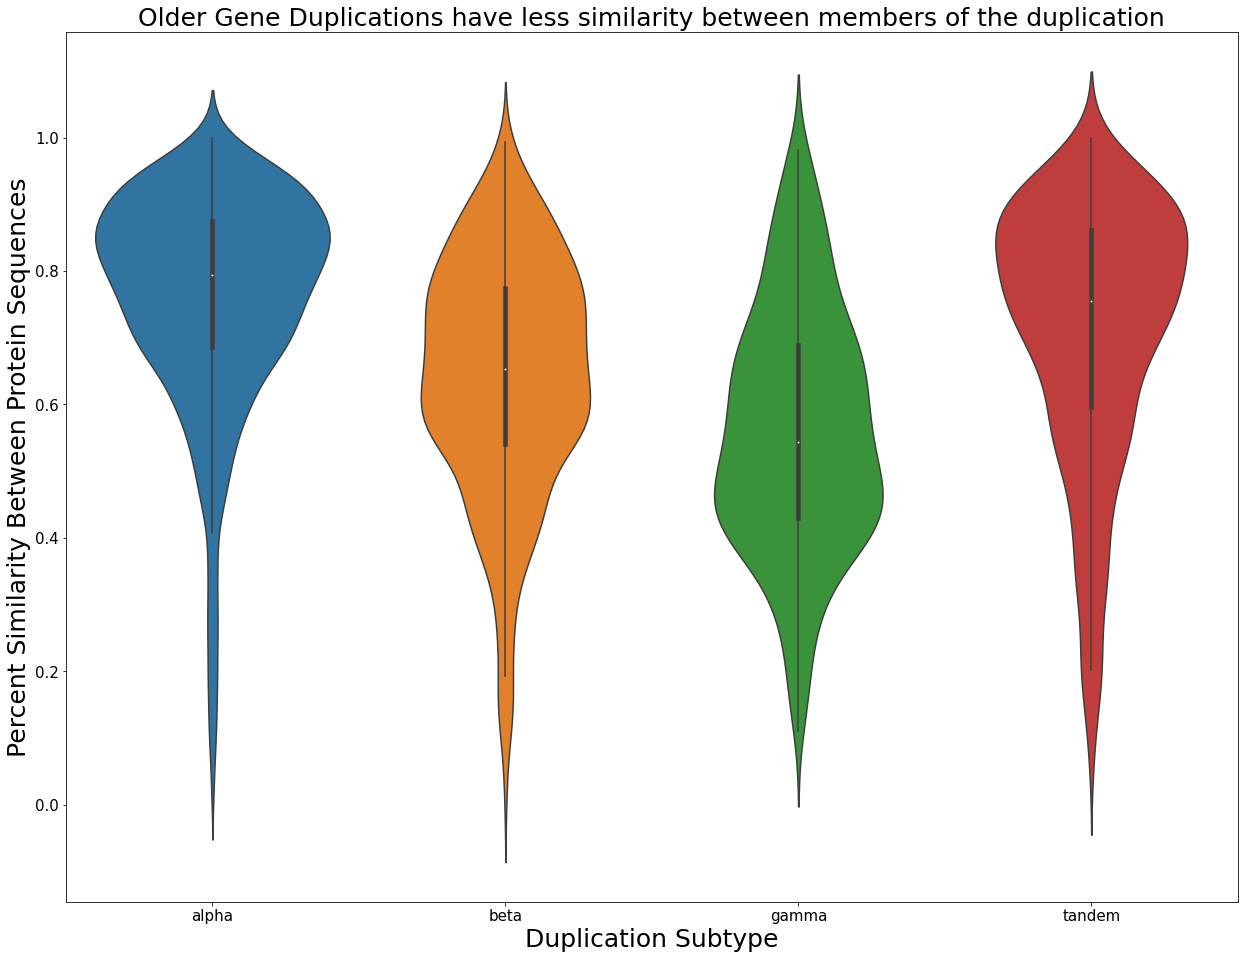

In [86]:
subset_gene_dupe = full_duplicate_data.loc[full_duplicate_data['Subtype'].isin(['alpha','beta','gamma','tandem'])]
fig, ax = plt.subplots(figsize = (21,16))
sns.violinplot(x = 'Subtype',y = 'psimil', data = subset_gene_dupe)
plt.xlabel("Duplication Subtype", fontsize = 25)
plt.ylabel("Percent Similarity Between Protein Sequences", fontsize = 25)
plt.title("Older Gene Duplications have less similarity between members of the duplication", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

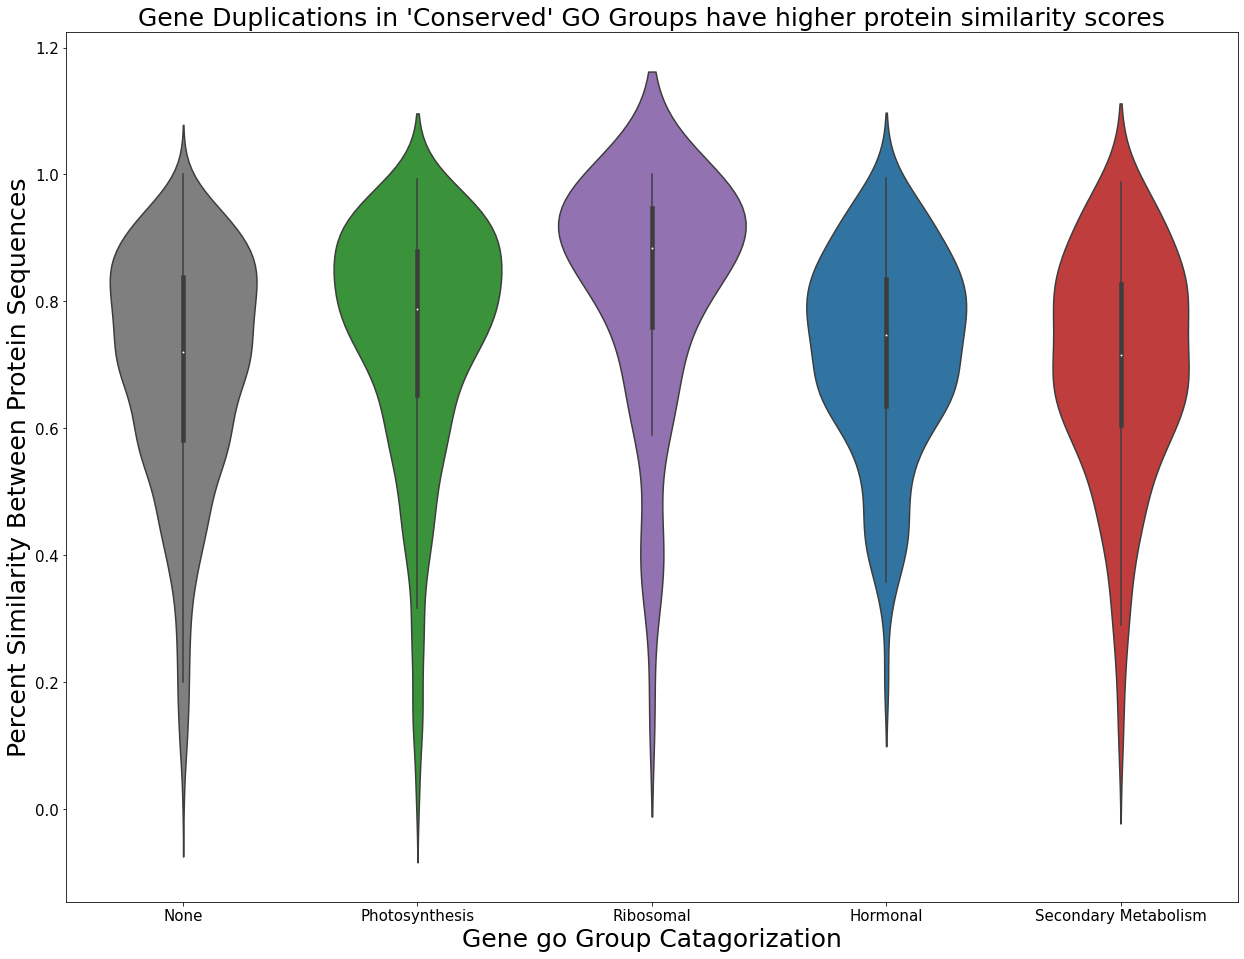

In [87]:
fig, ax = plt.subplots(figsize = (21,16))
sns.violinplot(x = 'Annotation',y = 'psimil', data = only_wgd,palette = ['tab:grey','tab:green','tab:purple','tab:blue','tab:red'])
plt.xlabel("Gene go Group Catagorization", fontsize = 25)
plt.ylabel("Percent Similarity Between Protein Sequences", fontsize = 25)
plt.title("Gene Duplications in 'Conserved' GO Groups have higher protein similarity scores", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

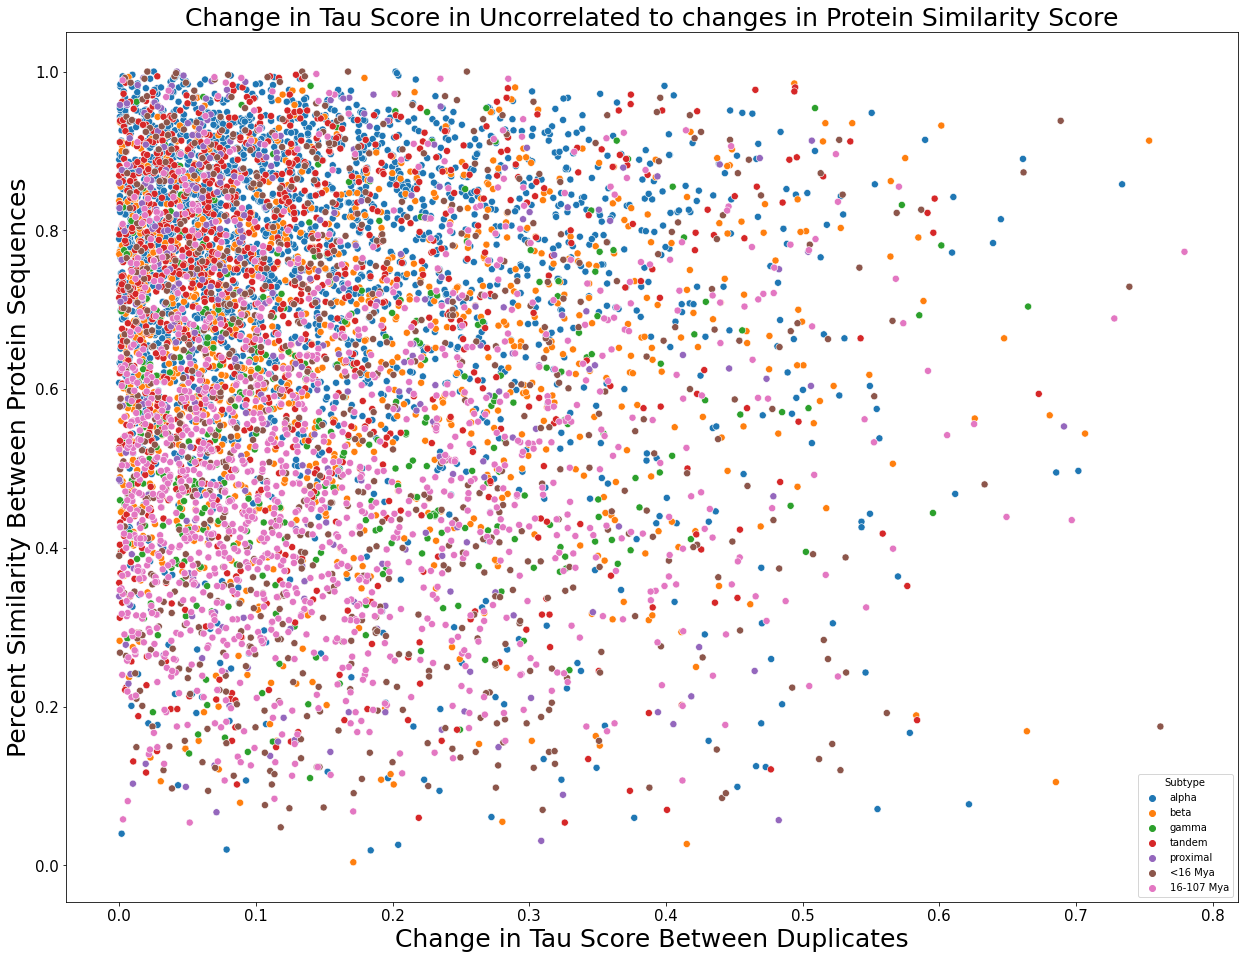

In [88]:
fig, ax = plt.subplots(figsize = (21,16))
sns.scatterplot(data = full_duplicate_data, y = 'psimil', x = 'Difference in scores', hue = 'Subtype', s = 50, )
plt.xlabel("Change in Tau Score Between Duplicates", fontsize = 25)
plt.ylabel("Percent Similarity Between Protein Sequences", fontsize = 25)
plt.title("Change in Tau Score in Uncorrelated to changes in Protein Similarity Score", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

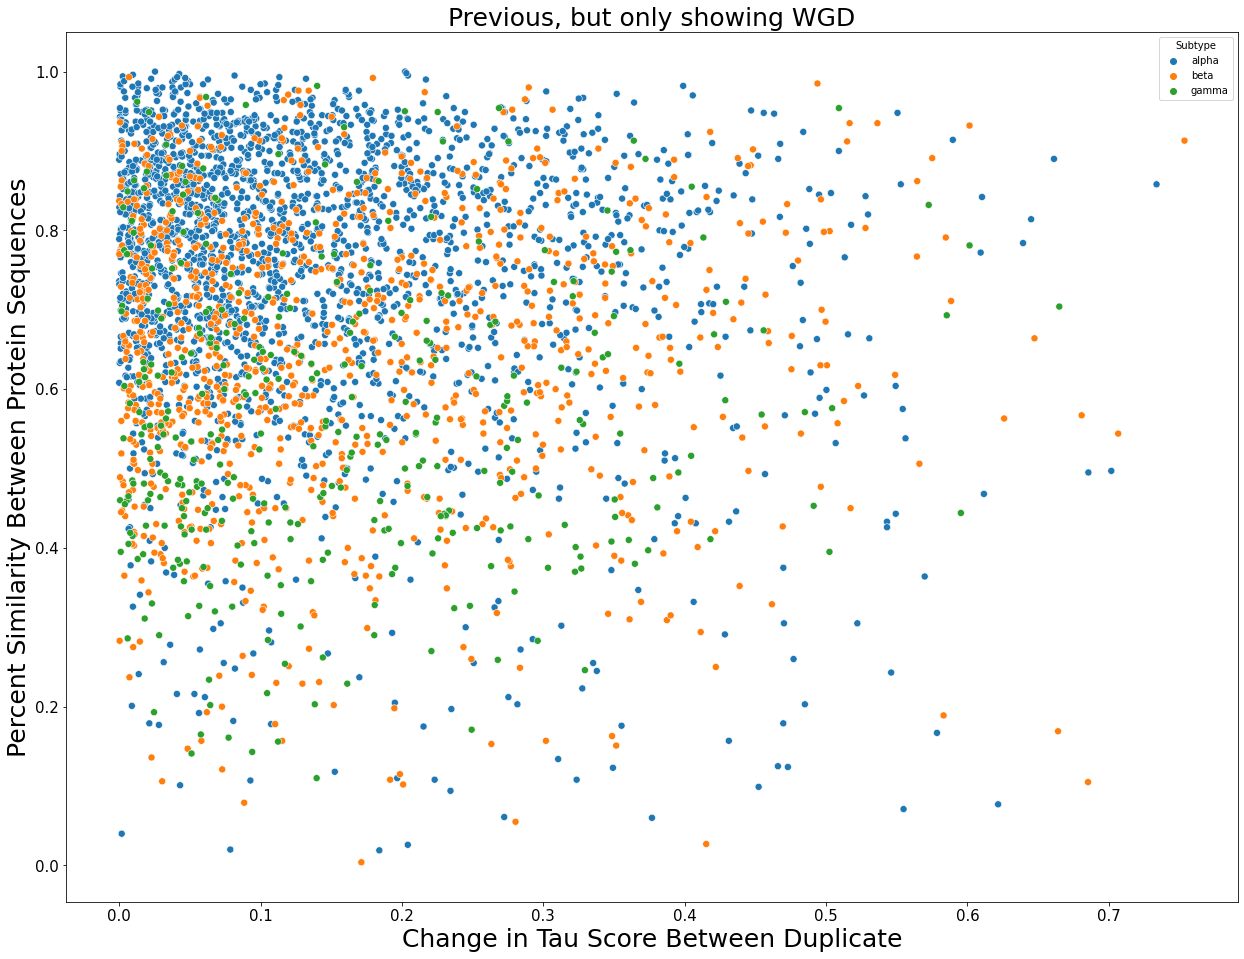

In [89]:
fig, ax = plt.subplots(figsize = (21,16))
sns.scatterplot(data = only_wgd, y = 'psimil', x = 'Difference in scores', hue = 'Subtype', s = 50, )
plt.xlabel("Change in Tau Score Between Duplicate", fontsize = 25)
plt.ylabel("Percent Similarity Between Protein Sequences", fontsize = 25)
plt.title("Previous, but only showing WGD", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

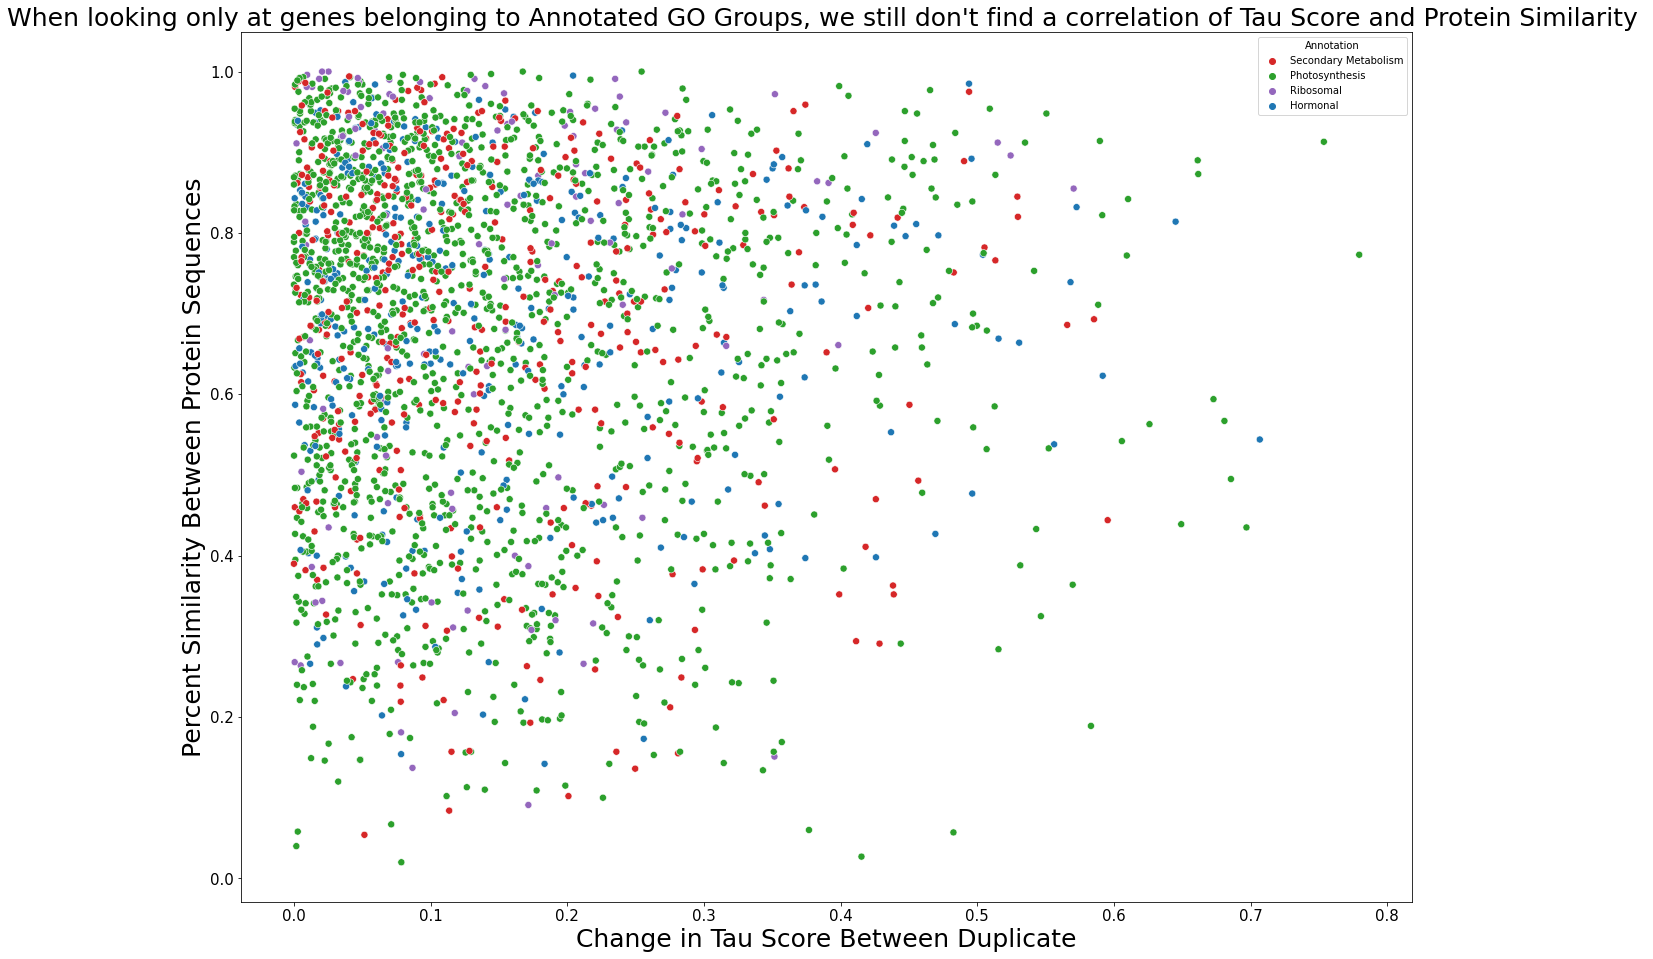

In [90]:
subset_annotation = full_duplicate_data.loc[full_duplicate_data['Annotation'].isin(['Photosynthesis','Ribosomal','Hormonal','Secondary Metabolism'])]
fig, ax = plt.subplots(figsize = (21,16))
sns.scatterplot(data = subset_annotation, y = 'psimil', x = 'Difference in scores', hue = 'Annotation', s = 50, hue_order =['Secondary Metabolism','Photosynthesis','Ribosomal','Hormonal'], palette = ['tab:red','tab:green','tab:purple','tab:blue'])
plt.xlabel("Change in Tau Score Between Duplicate", fontsize = 25)
plt.ylabel("Percent Similarity Between Protein Sequences", fontsize = 25)
plt.title("When looking only at genes belonging to Annotated GO Groups, we still don't find a correlation of Tau Score and Protein Similarity ", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

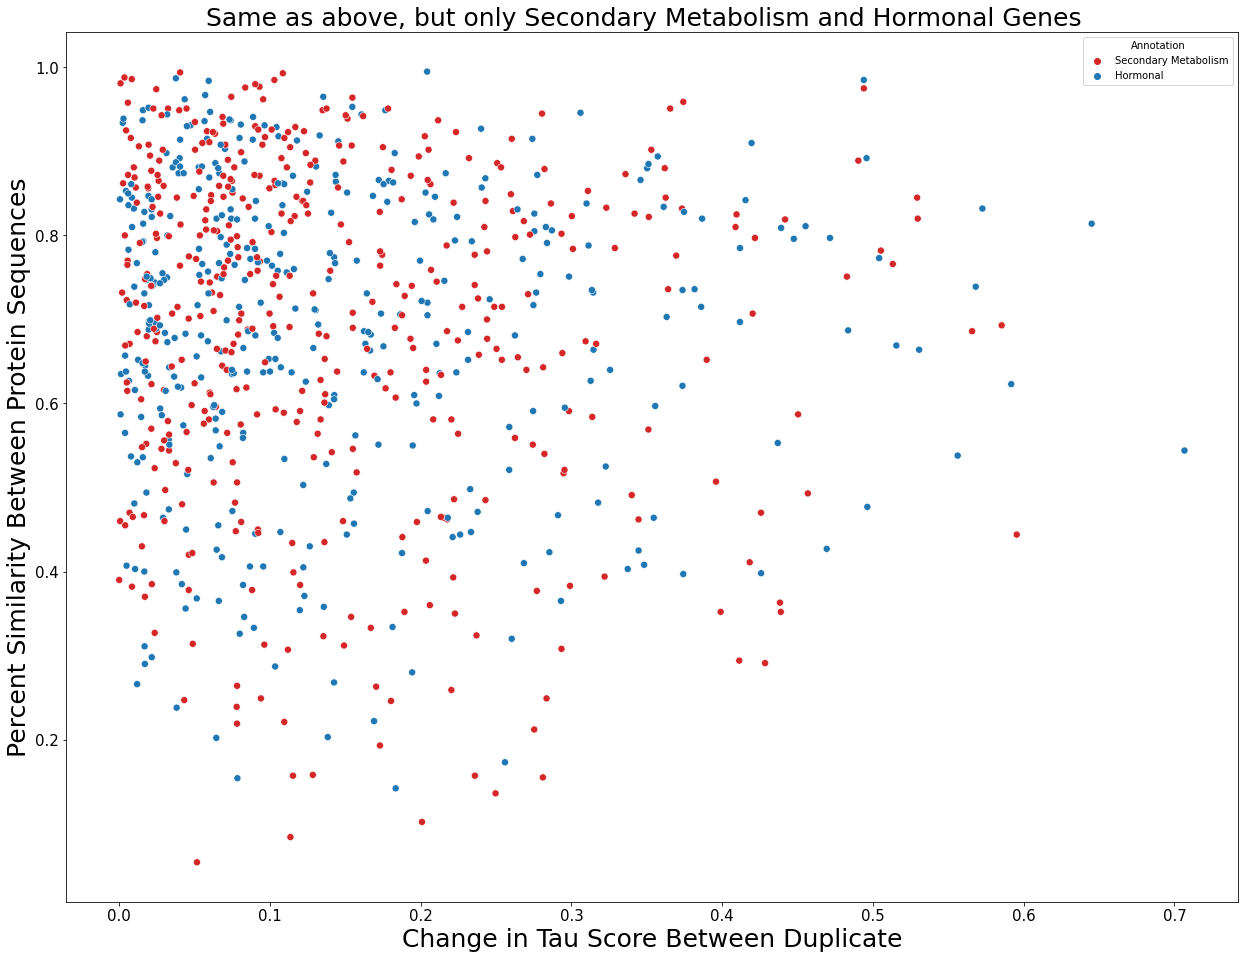

In [91]:
subset_annotation = full_duplicate_data.loc[full_duplicate_data['Annotation'].isin(['Hormonal','Secondary Metabolism'])]
fig, ax = plt.subplots(figsize = (21,16))
sns.scatterplot(data = subset_annotation, y = 'psimil', x = 'Difference in scores', hue = 'Annotation', s = 50, hue_order =['Secondary Metabolism','Hormonal'], palette = ['tab:red','tab:blue'])
plt.xlabel("Change in Tau Score Between Duplicate", fontsize = 25)
plt.ylabel("Percent Similarity Between Protein Sequences", fontsize = 25)
plt.title("Same as above, but only Secondary Metabolism and Hormonal Genes  ", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)